In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import MaxAbsScaler

EDA 

target: AMT_CREDIT and Target


How much loan amount a user is likely to request based on their profile.

In [48]:
df=pd.read_csv('../data/final/aggregated_table.csv')

In [49]:
df.shape

(82180, 52)

In [50]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,inst_mean_payment_delay,inst_mean_payment_rate,avg_prev_amt_requested,prev_num_approved,prev_num_rejected,prev_num_applications,avg_cc_amt_balance,avg_cc_amt_payment_total_current,max_cc_sk_dpd,max_cc_sk_dpd_def
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,-20,1.000000,179055.000000,1,0,1,0.0,0.0,0.0,0.0
1,100009,0,Cash loans,F,Y,Y,1,171000.0,1560726.0,41301.0,...,-8,1.000000,76741.714286,7,0,7,0.0,0.0,0.0,0.0
2,100014,0,Cash loans,F,N,Y,1,112500.0,652500.0,21177.0,...,-8,0.736842,96536.250000,2,0,2,0.0,0.0,0.0,0.0
3,100016,0,Cash loans,F,N,Y,0,67500.0,80865.0,5881.5,...,-1,0.837838,120745.125000,4,0,4,0.0,0.0,0.0,0.0
4,100019,0,Cash loans,M,Y,Y,0,157500.0,299772.0,20160.0,...,-30,1.441113,84136.500000,1,0,1,0.0,0.0,0.0,0.0


In [51]:
df.sample(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,inst_mean_payment_delay,inst_mean_payment_rate,avg_prev_amt_requested,prev_num_approved,prev_num_rejected,prev_num_applications,avg_cc_amt_balance,avg_cc_amt_payment_total_current,max_cc_sk_dpd,max_cc_sk_dpd_def
71734,411130,0,Cash loans,F,N,N,1,99000.0,521280.0,24286.5,...,0,0.000000,0.0,0,0,0,0.00000,0.00000,0.0,0.0
26714,215312,0,Revolving loans,F,N,Y,0,67500.0,180000.0,9000.0,...,-21,1.000000,94896.0,1,0,1,0.00000,0.00000,0.0,0.0
41889,281339,0,Cash loans,F,N,Y,0,112500.0,450000.0,23431.5,...,-13,0.979592,167219.1,4,1,5,0.00000,0.00000,0.0,0.0
68617,397192,0,Cash loans,F,N,Y,0,202500.0,540000.0,39424.5,...,-1,0.962963,67213.5,2,1,3,446486.03325,52196.67675,0.0,0.0
78592,440595,0,Cash loans,F,N,Y,0,45000.0,225000.0,9531.0,...,-10,1.084292,161718.0,5,7,12,29162.84265,2738.42055,1.0,1.0


In [52]:
df.isnull().sum()

SK_ID_CURR                          0
TARGET                              0
NAME_CONTRACT_TYPE                  0
CODE_GENDER                         0
FLAG_OWN_CAR                        0
FLAG_OWN_REALTY                     0
CNT_CHILDREN                        0
AMT_INCOME_TOTAL                    0
AMT_CREDIT                          0
AMT_ANNUITY                         0
AMT_GOODS_PRICE                     0
NAME_INCOME_TYPE                    0
NAME_EDUCATION_TYPE                 0
NAME_FAMILY_STATUS                  0
NAME_HOUSING_TYPE                   0
REGION_POPULATION_RELATIVE          0
DAYS_BIRTH                          0
DAYS_EMPLOYED                       0
DAYS_REGISTRATION                   0
OCCUPATION_TYPE                     0
CNT_FAM_MEMBERS                     0
REGION_RATING_CLIENT                0
ORGANIZATION_TYPE                   0
EXT_SOURCE_1                        0
EXT_SOURCE_2                        0
EXT_SOURCE_3                        0
OBS_30_CNT_S

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82180 entries, 0 to 82179
Data columns (total 52 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   SK_ID_CURR                        82180 non-null  int64  
 1   TARGET                            82180 non-null  int64  
 2   NAME_CONTRACT_TYPE                82180 non-null  object 
 3   CODE_GENDER                       82180 non-null  object 
 4   FLAG_OWN_CAR                      82180 non-null  object 
 5   FLAG_OWN_REALTY                   82180 non-null  object 
 6   CNT_CHILDREN                      82180 non-null  int64  
 7   AMT_INCOME_TOTAL                  82180 non-null  float64
 8   AMT_CREDIT                        82180 non-null  float64
 9   AMT_ANNUITY                       82180 non-null  float64
 10  AMT_GOODS_PRICE                   82180 non-null  float64
 11  NAME_INCOME_TYPE                  82180 non-null  object 
 12  NAME

In [54]:
df["Credit_to_Income_Ratio"] = df["AMT_CREDIT"] / df["AMT_INCOME_TOTAL"]
df["Annuity_to_Income_Ratio"] = df["AMT_ANNUITY"] / df["AMT_INCOME_TOTAL"]
df["Annuity_to_Credit_Ratio"] = df["AMT_ANNUITY"] / df["AMT_CREDIT"]

In [55]:

num_cols = df.select_dtypes(include=['int64', 'float64'])

zero_counts =((num_cols == 0).sum() / len(df)) * 100

print("Number of zeros in each numeric column:")
print(zero_counts)


Number of zeros in each numeric column:
SK_ID_CURR                           0.000000
TARGET                              92.406912
CNT_CHILDREN                        59.052081
AMT_INCOME_TOTAL                     0.000000
AMT_CREDIT                           0.000000
AMT_ANNUITY                          0.000000
AMT_GOODS_PRICE                      0.000000
REGION_POPULATION_RELATIVE           0.000000
DAYS_BIRTH                           0.000000
DAYS_EMPLOYED                        0.000000
DAYS_REGISTRATION                    0.023120
CNT_FAM_MEMBERS                      0.000000
REGION_RATING_CLIENT                 0.000000
EXT_SOURCE_1                         0.000000
EXT_SOURCE_2                         0.000000
EXT_SOURCE_3                         0.000000
OBS_30_CNT_SOCIAL_CIRCLE            52.274276
DEF_30_CNT_SOCIAL_CIRCLE            88.646873
OBS_60_CNT_SOCIAL_CIRCLE            52.521295
DEF_60_CNT_SOCIAL_CIRCLE            91.688975
DAYS_LAST_PHONE_CHANGE               9.2

In [56]:
df.nunique()

SK_ID_CURR                          82180
TARGET                                  2
NAME_CONTRACT_TYPE                      2
CODE_GENDER                             3
FLAG_OWN_CAR                            2
FLAG_OWN_REALTY                         2
CNT_CHILDREN                           15
AMT_INCOME_TOTAL                     1001
AMT_CREDIT                           4019
AMT_ANNUITY                         10245
AMT_GOODS_PRICE                       557
NAME_INCOME_TYPE                        5
NAME_EDUCATION_TYPE                     5
NAME_FAMILY_STATUS                      5
NAME_HOUSING_TYPE                       6
REGION_POPULATION_RELATIVE             81
DAYS_BIRTH                          14344
DAYS_EMPLOYED                        9455
DAYS_REGISTRATION                   12164
OCCUPATION_TYPE                        18
CNT_FAM_MEMBERS                        15
REGION_RATING_CLIENT                    3
ORGANIZATION_TYPE                      57
EXT_SOURCE_1                      

In [57]:

corr_matrix = df.corr(numeric_only=True).abs()

high_corr_pairs = []

for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        if corr_matrix.iloc[i, j] > 0.85:
            col1 = corr_matrix.columns[i]
            col2 = corr_matrix.columns[j]
            corr_value = corr_matrix.iloc[i, j]
            high_corr_pairs.append((col1, col2, corr_value))

high_corr_df = pd.DataFrame(high_corr_pairs, columns=['Column1', 'Column2', 'Correlation'])
display(high_corr_df)

,Column1,Column2,Correlation
0,CNT_CHILDREN,CNT_FAM_MEMBERS,0.901833
1,AMT_CREDIT,AMT_GOODS_PRICE,0.987098
2,OBS_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,0.998747
3,DEF_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,0.869359
4,pos_num_loans,prev_num_approved,0.947371
5,prev_num_rejected,prev_num_applications,0.859608


In [58]:
df.drop(columns=['CNT_CHILDREN','EMPLOYED_FLAG','AMT_GOODS_PRICE', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'prev_num_applications','AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_QRT'], inplace=True, errors='ignore')

In [59]:

df["AMT_CREDIT_log"] = np.log1p(df["AMT_CREDIT"])
upper = df["AMT_CREDIT_log"].quantile(0.99)
df["AMT_CREDIT_log"] = df["AMT_CREDIT_log"].clip(upper=upper)

Normalization

In [60]:

num_cols = df.select_dtypes(include=['int64', 'float64'])

zero_counts =((num_cols == 0).sum() / len(df)) * 100

print("Number of zeros in each numeric column:")
print(zero_counts)

Number of zeros in each numeric column:
SK_ID_CURR                           0.000000
TARGET                              92.406912
AMT_INCOME_TOTAL                     0.000000
AMT_CREDIT                           0.000000
AMT_ANNUITY                          0.000000
REGION_POPULATION_RELATIVE           0.000000
DAYS_BIRTH                           0.000000
DAYS_EMPLOYED                        0.000000
DAYS_REGISTRATION                    0.023120
CNT_FAM_MEMBERS                      0.000000
REGION_RATING_CLIENT                 0.000000
EXT_SOURCE_1                         0.000000
EXT_SOURCE_2                         0.000000
EXT_SOURCE_3                         0.000000
OBS_60_CNT_SOCIAL_CIRCLE            52.521295
DEF_60_CNT_SOCIAL_CIRCLE            91.688975
DAYS_LAST_PHONE_CHANGE               9.241908
AMT_REQ_CREDIT_BUREAU_MON           81.292285
AMT_REQ_CREDIT_BUREAU_YEAR          26.922609
bureau_overdue_months               98.134583
AVG_Loan_Amount                     89.0

In [61]:
df.drop(columns=['AVG_Loan_Amount'], inplace=True, errors='ignore')

In [62]:
df['AMT_REQ_CREDIT_BUREAU_MON']=(df['AMT_REQ_CREDIT_BUREAU_MON']>0).astype(int)
df['bureau_overdue_months']=(df['bureau_overdue_months']>0).astype(int)
df['total_active_bureau_loans']=(df['total_active_bureau_loans']>0).astype(int)
df['max_cc_sk_dpd']=(df['max_cc_sk_dpd']>0).astype(int)
df['max_cc_sk_dpd_def']=(df['max_cc_sk_dpd_def']>0).astype(int)


In [63]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_INCOME_TYPE,...,prev_num_approved,prev_num_rejected,avg_cc_amt_balance,avg_cc_amt_payment_total_current,max_cc_sk_dpd,max_cc_sk_dpd_def,Credit_to_Income_Ratio,Annuity_to_Income_Ratio,Annuity_to_Credit_Ratio,AMT_CREDIT_log
0,100002,1,Cash loans,M,N,Y,202500.0,406597.5,24700.5,Working,...,1,0,0.0,0.0,0,0,2.007889,0.121978,0.060749,12.915581
1,100009,0,Cash loans,F,Y,Y,171000.0,1560726.0,41301.0,Commercial associate,...,7,0,0.0,0.0,0,0,9.127053,0.241526,0.026463,14.260662
2,100014,0,Cash loans,F,N,Y,112500.0,652500.0,21177.0,Working,...,2,0,0.0,0.0,0,0,5.800000,0.188240,0.032455,13.388568
3,100016,0,Cash loans,F,N,Y,67500.0,80865.0,5881.5,Working,...,4,0,0.0,0.0,0,0,1.198000,0.087133,0.072732,11.300549
4,100019,0,Cash loans,M,Y,Y,157500.0,299772.0,20160.0,Working,...,1,0,0.0,0.0,0,0,1.903314,0.128000,0.067251,12.610781


univarte_plots Numeric

In [64]:
df['EMPLOYED_FLAG'] = (df['DAYS_EMPLOYED'] < 365243).astype(int)
df.drop(columns=['DAYS_EMPLOYED'], inplace=True, errors='ignore')

In [65]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.drop(['SK_ID_CURR', 'TARGET','REGION_RATING_CLIENT','CNT_FAM_MEMBERS','EMPLOYED_FLAG','OBS_60_CNT_SOCIAL_CIRCLE', 
                     'DEF_60_CNT_SOCIAL_CIRCLE','AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_YEAR','bureau_overdue_months',
                     'total_active_bureau_loans', 'pos_num_loans','max_cc_sk_dpd', 'max_cc_sk_dpd_def','inst_mean_payment_rate','prev_num_approved', "prev_num_rejected"])

In [66]:
summary_stats = df[num_cols].describe().T
summary_stats['median'] = df[num_cols].median()
summary_stats['skew'] = df[num_cols].skew()
display(summary_stats.head())

,count,mean,std,min,25%,50%,75%,max,median,skew
AMT_INCOME_TOTAL,82180.0,182964.023156,421560.958868,27000.00000,112500.000000,157500.00000,225000.000000,1.170000e+08,157500.00000,259.122043
AMT_CREDIT,82180.0,625499.941902,416623.624033,45000.00000,284400.000000,531000.00000,841500.000000,4.050000e+06,531000.00000,1.224685
AMT_ANNUITY,82180.0,28369.382417,14826.008413,2317.50000,17509.500000,26217.00000,36292.500000,2.580255e+05,26217.00000,1.447163
REGION_POPULATION_RELATIVE,82180.0,0.020794,0.013623,0.00029,0.010006,0.01885,0.028663,7.250800e-02,0.01885,1.470405
DAYS_BIRTH,82180.0,-14142.482222,3341.269949,-25017.00000,-16429.000000,-13836.00000,-11493.000000,-7.680000e+03,-13836.00000,-0.391502


In [67]:
num_cols_parts = np.array_split(num_cols, 3)

part1, part2, part3= num_cols_parts

In [68]:
cols=["AMT_INCOME_TOTAL", "AMT_ANNUITY","pos_mean_cnt_instalment","inst_mean_payment_delay","avg_prev_amt_requested", "avg_cc_amt_balance", "avg_cc_amt_payment_total_current"]

In [69]:
df[cols]=np.log1p(df[cols])
for col in cols:
    upper = df[col].quantile(0.99)
    df[col] = df[col].clip(upper=upper)

c:\Users\parvr\anaconda3\envs\fintech\lib\site-packages\pandas\core\internals\blocks.py:395: RuntimeWarning: invalid value encountered in log1p
  result = func(self.values, **kwargs)
c:\Users\parvr\anaconda3\envs\fintech\lib\site-packages\pandas\core\internals\blocks.py:395: RuntimeWarning: divide by zero encountered in log1p
  result = func(self.values, **kwargs)


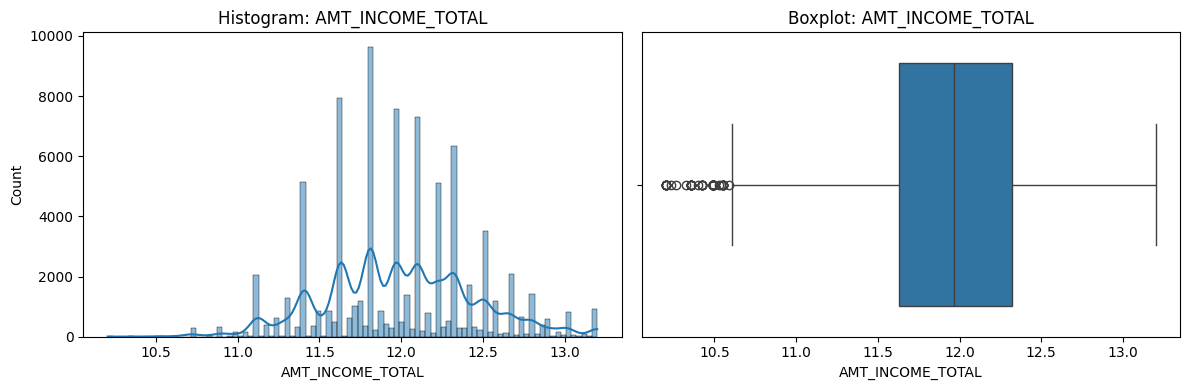

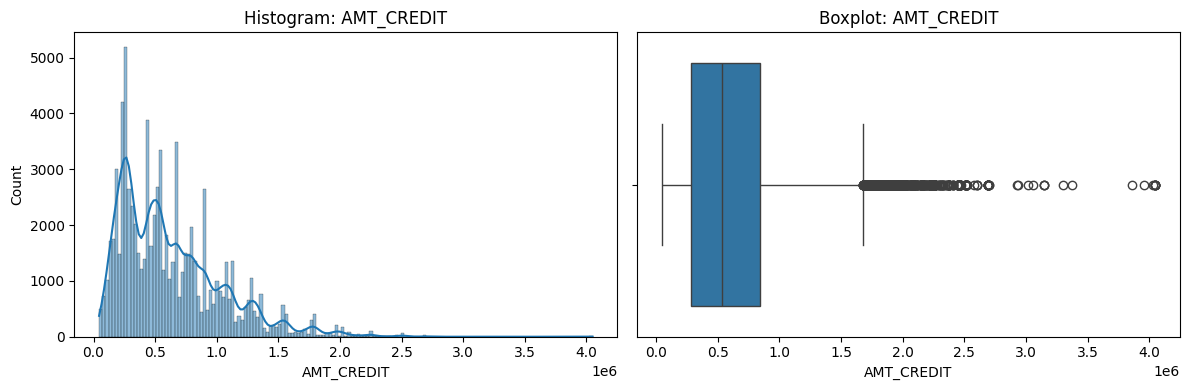

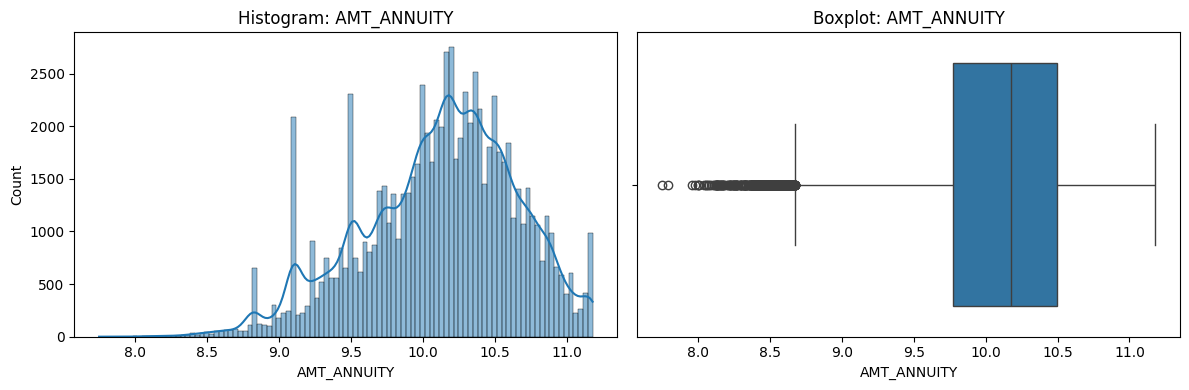

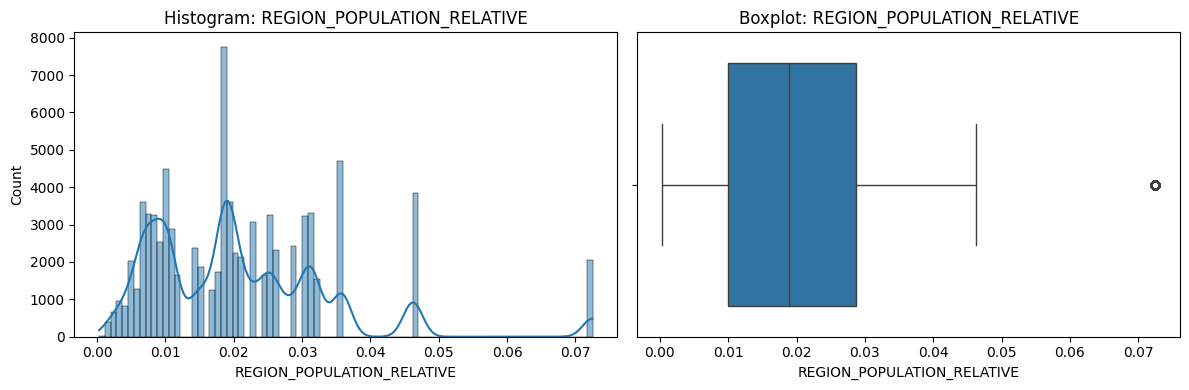

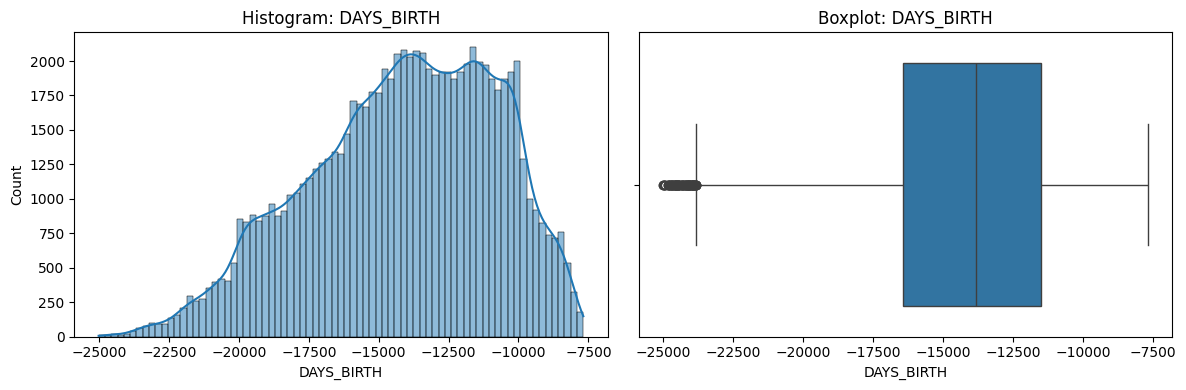

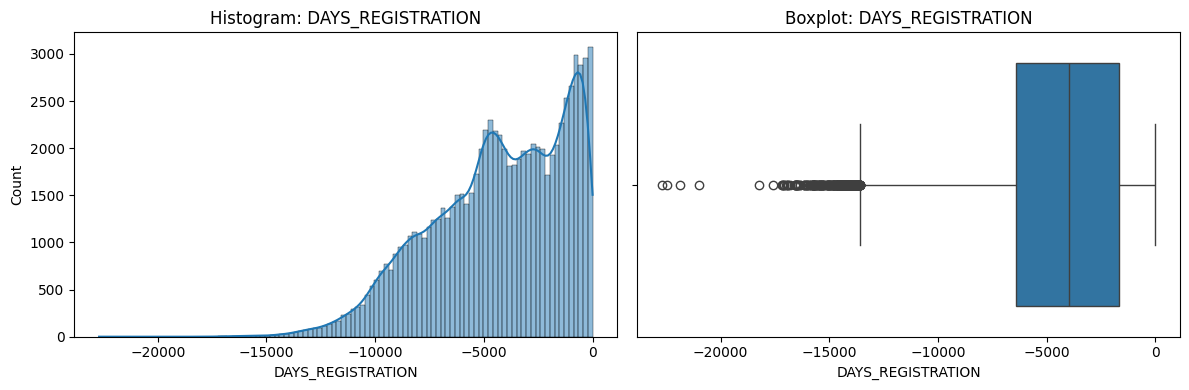

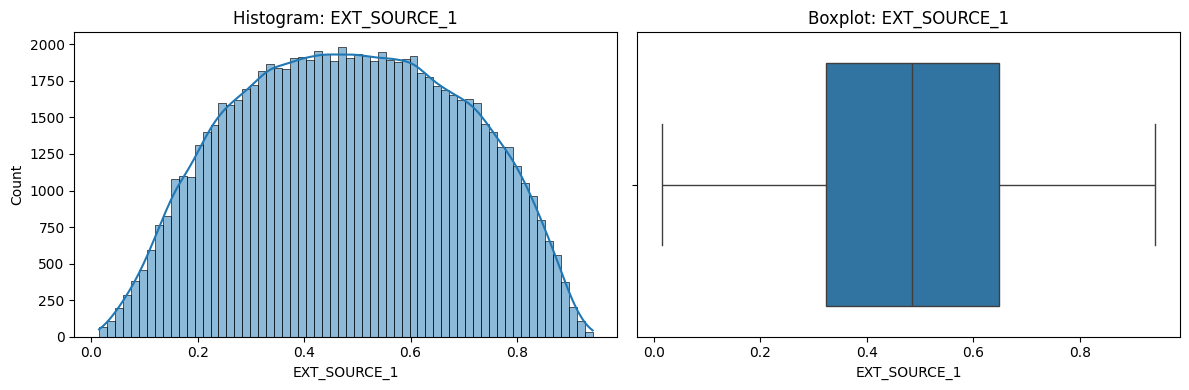

In [70]:
for col in part1:
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    # Histogram
    sns.histplot(data=df, x=col, ax=axes[0], kde=True)
    axes[0].set_title(f"Histogram: {col}")

    # Boxplot
    sns.boxplot(x=df[col], ax=axes[1])
    axes[1].set_title(f"Boxplot: {col}")

    plt.tight_layout()
    plt.show()

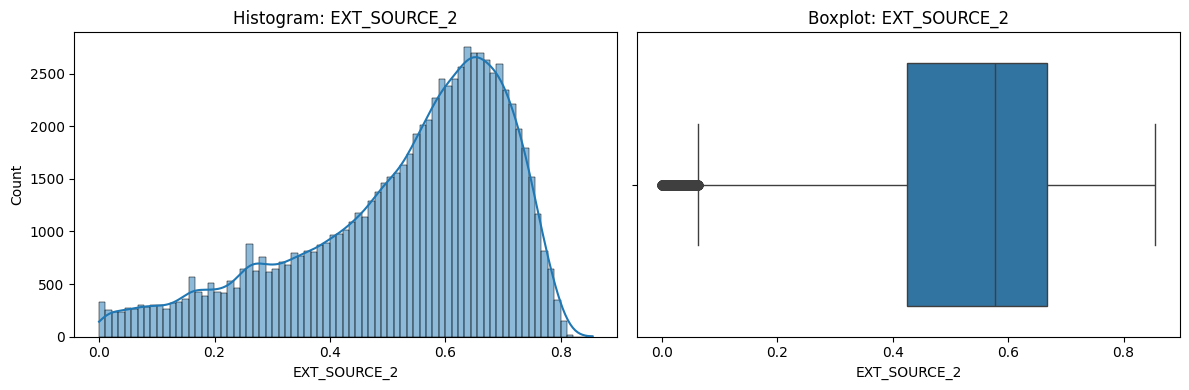

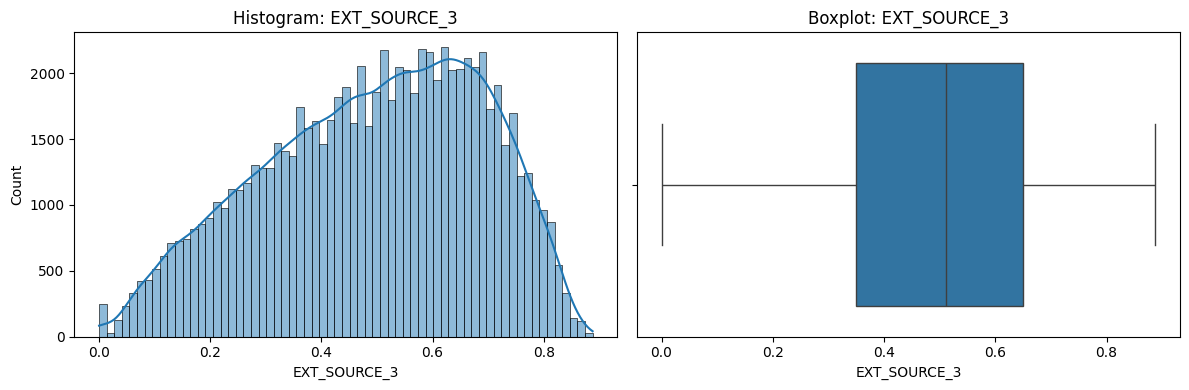

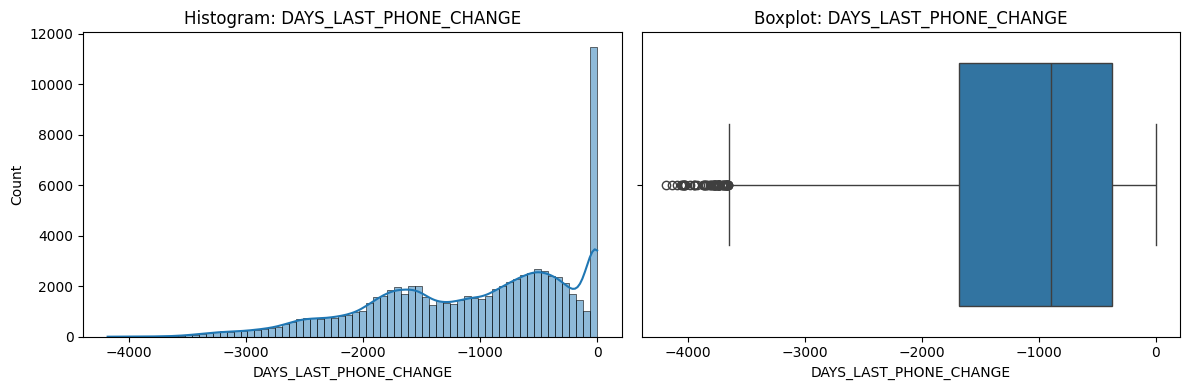

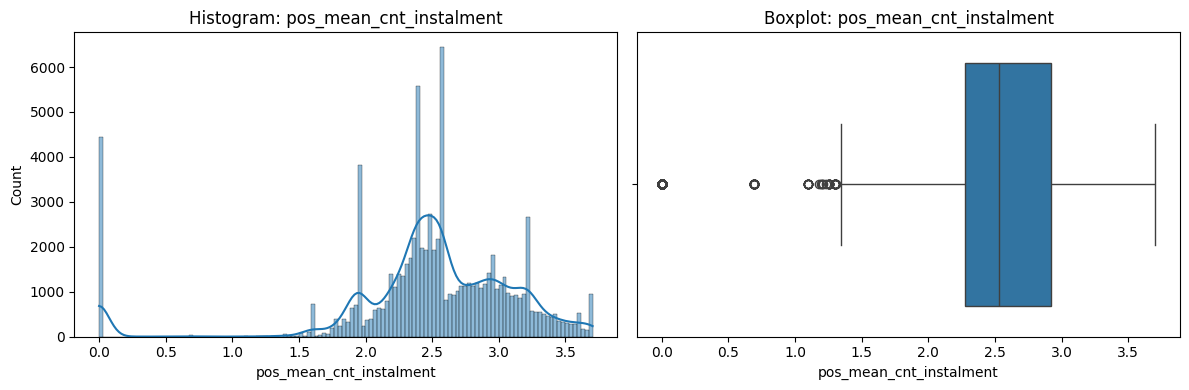

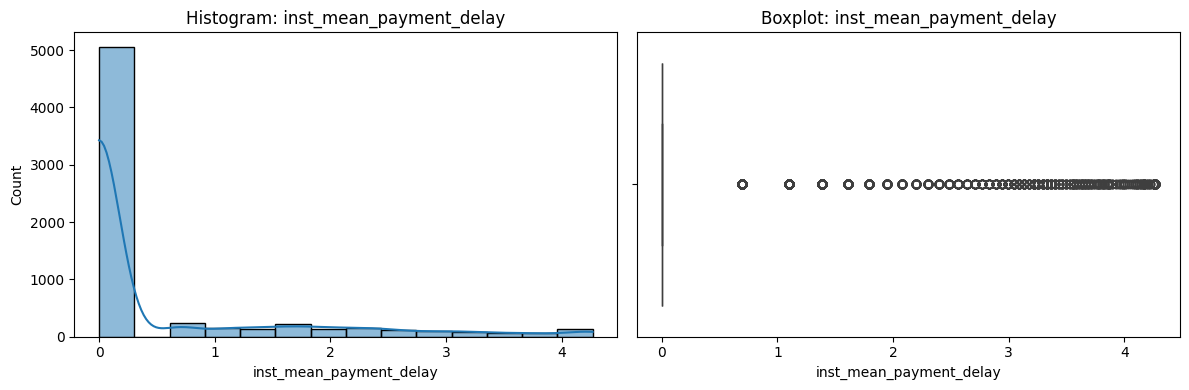

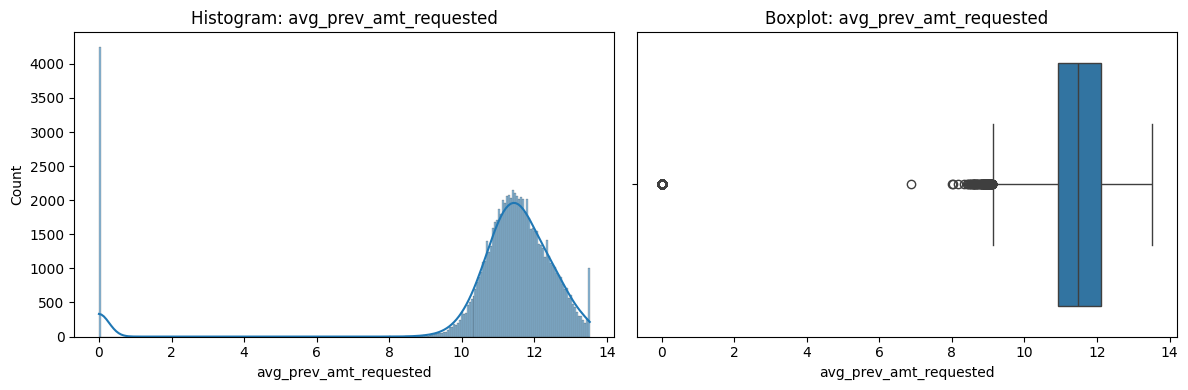

In [71]:
for col in part2:
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    # Histogram
    sns.histplot(data=df, x=col, ax=axes[0], kde=True)
    axes[0].set_title(f"Histogram: {col}")

    # Boxplot
    sns.boxplot(x=df[col], ax=axes[1])
    axes[1].set_title(f"Boxplot: {col}")

    plt.tight_layout()
    plt.show()

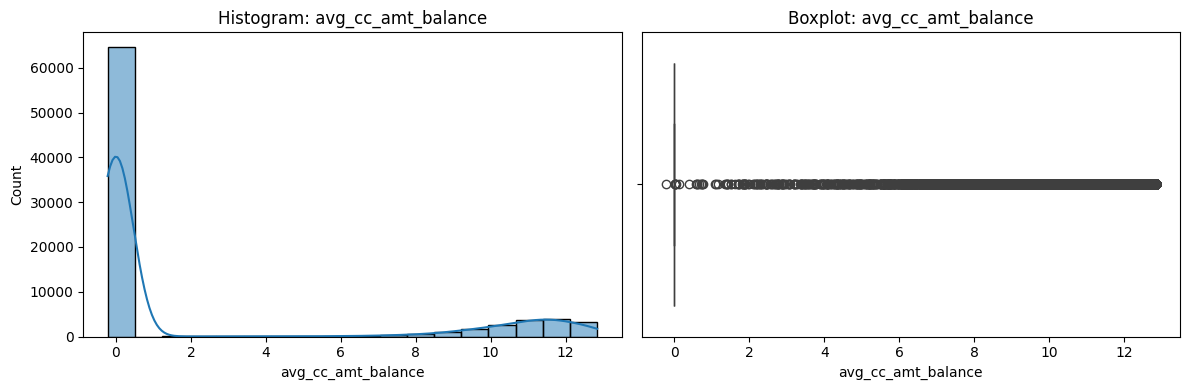

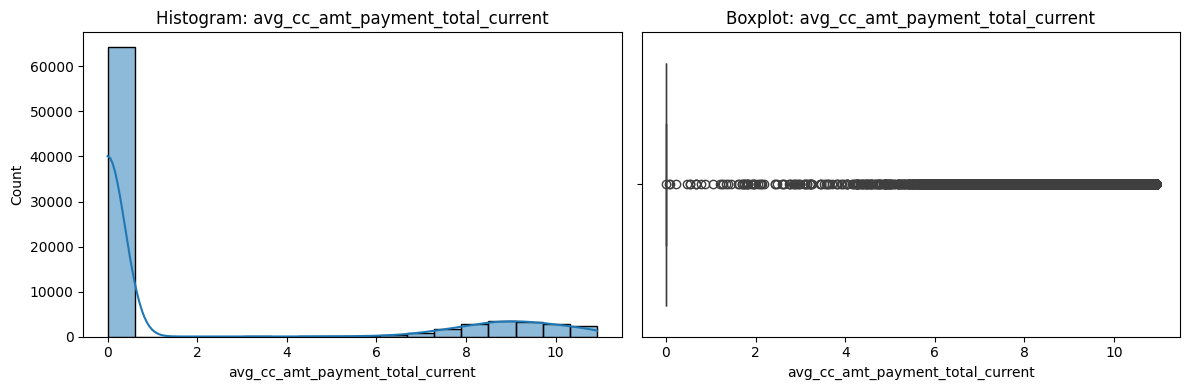

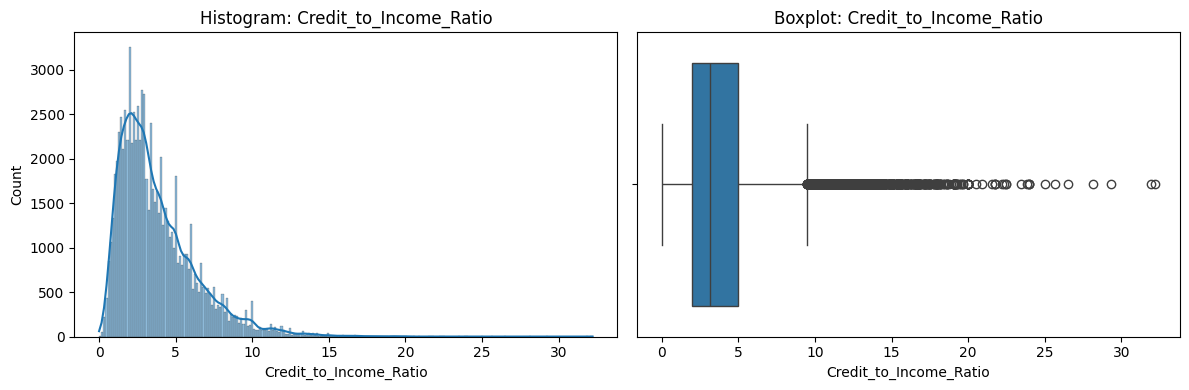

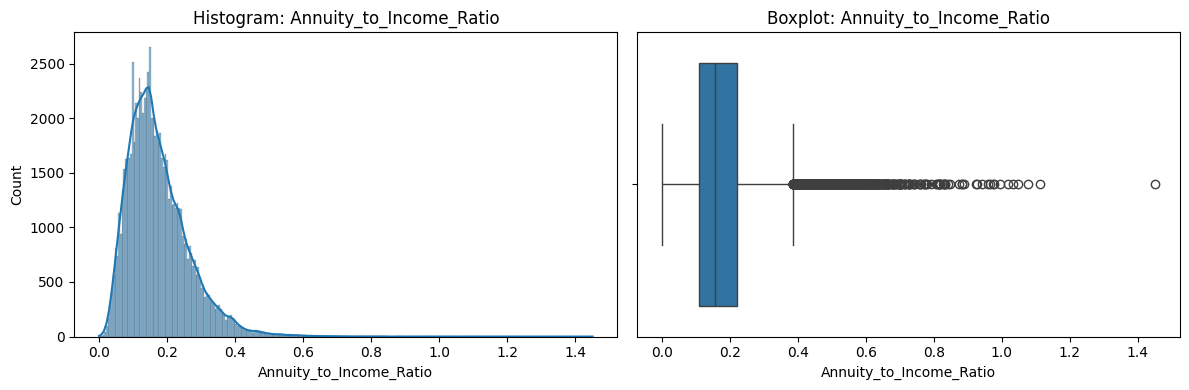

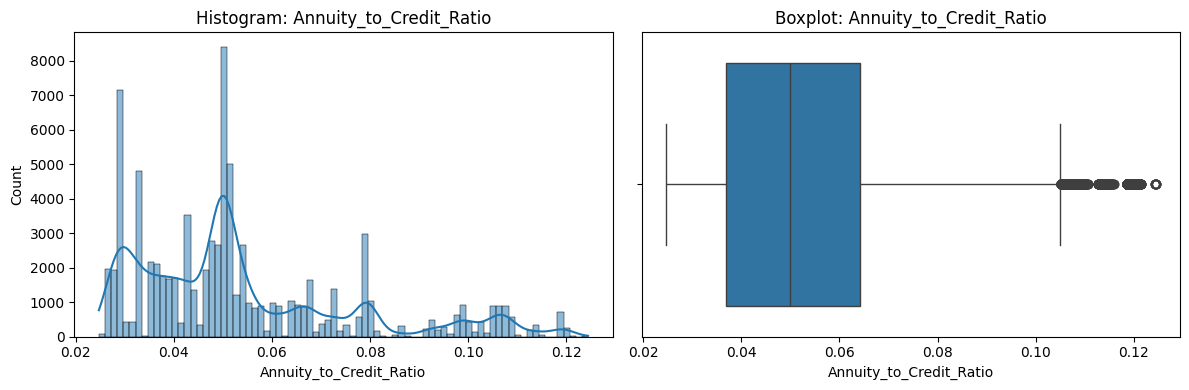

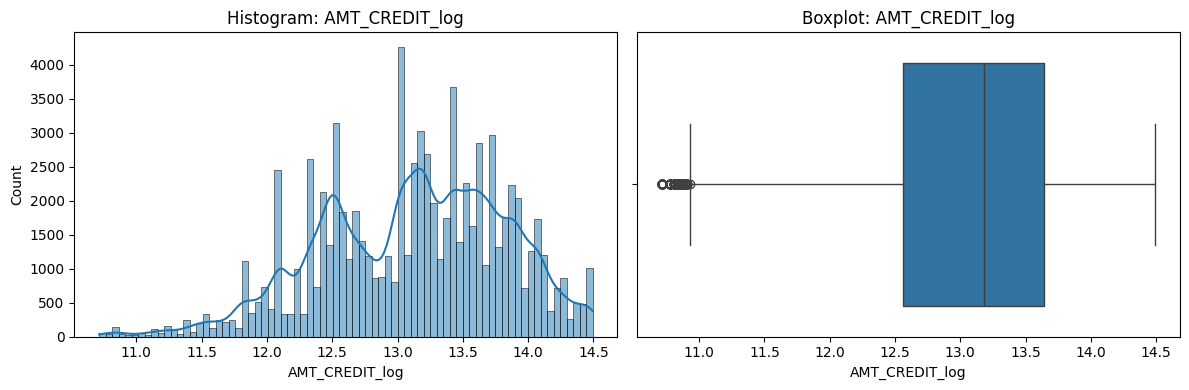

In [72]:
for col in part3:
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    # Histogram
    sns.histplot(data=df, x=col, ax=axes[0], kde=True)
    axes[0].set_title(f"Histogram: {col}")

    # Boxplot
    sns.boxplot(x=df[col], ax=axes[1])
    axes[1].set_title(f"Boxplot: {col}")

    plt.tight_layout()
    plt.show()

univarte_plots Categorical

In [73]:
cat_cols = df.select_dtypes(include=['object', 'category']).columns

In [74]:
top_n = 5
cols = ['NAME_INCOME_TYPE','OCCUPATION_TYPE','NAME_HOUSING_TYPE','ORGANIZATION_TYPE','CNT_FAM_MEMBERS','prev_num_rejected','prev_num_approved','pos_num_loans','AMT_REQ_CREDIT_BUREAU_YEAR','DEF_60_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE']

for col in cols:
    top_categories = df[col].value_counts().nlargest(top_n).index
    df[col] = df[col].where(df[col].isin(top_categories), 6)

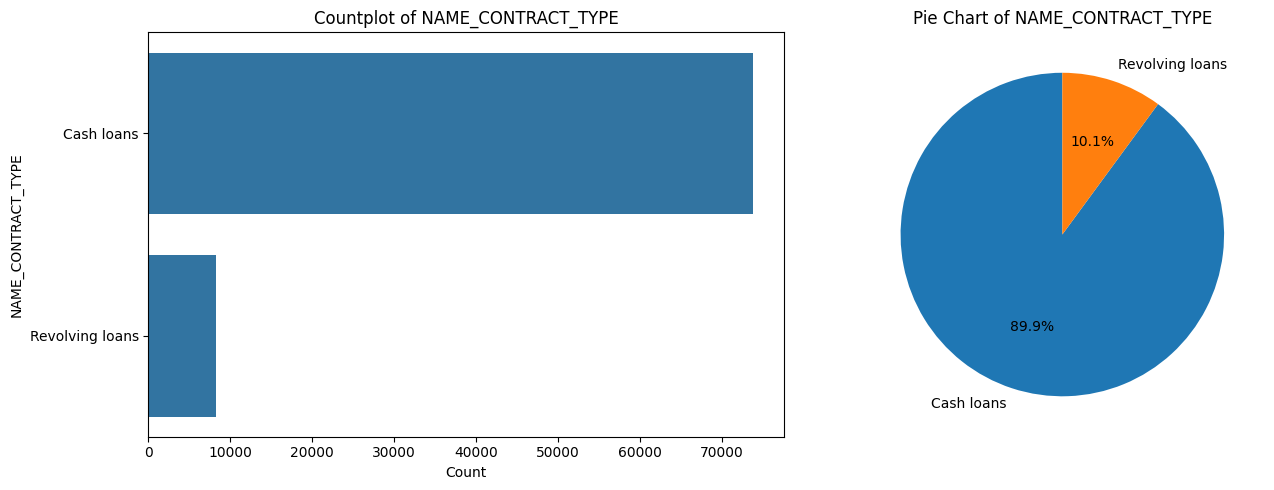

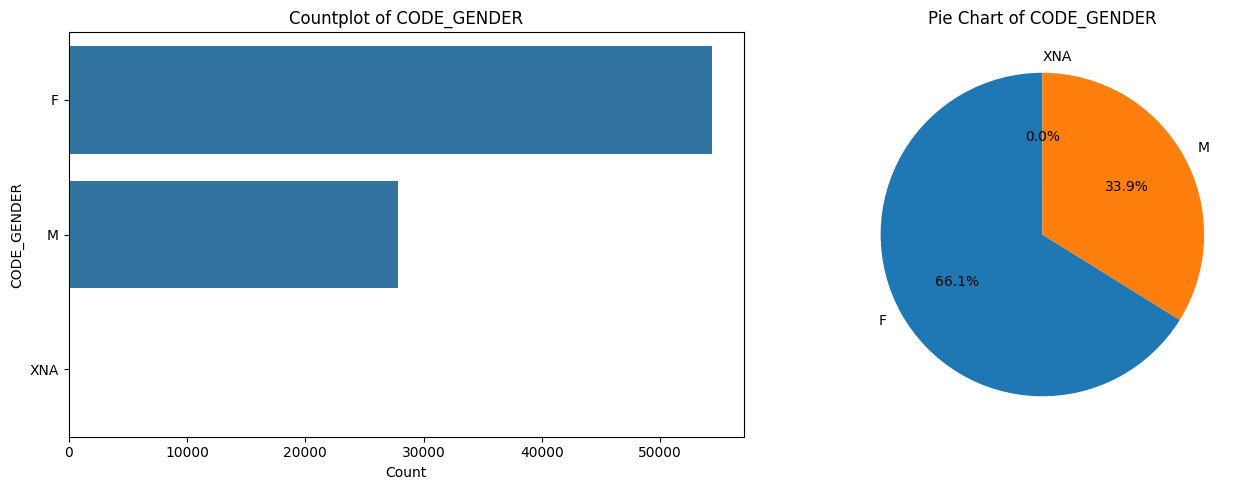

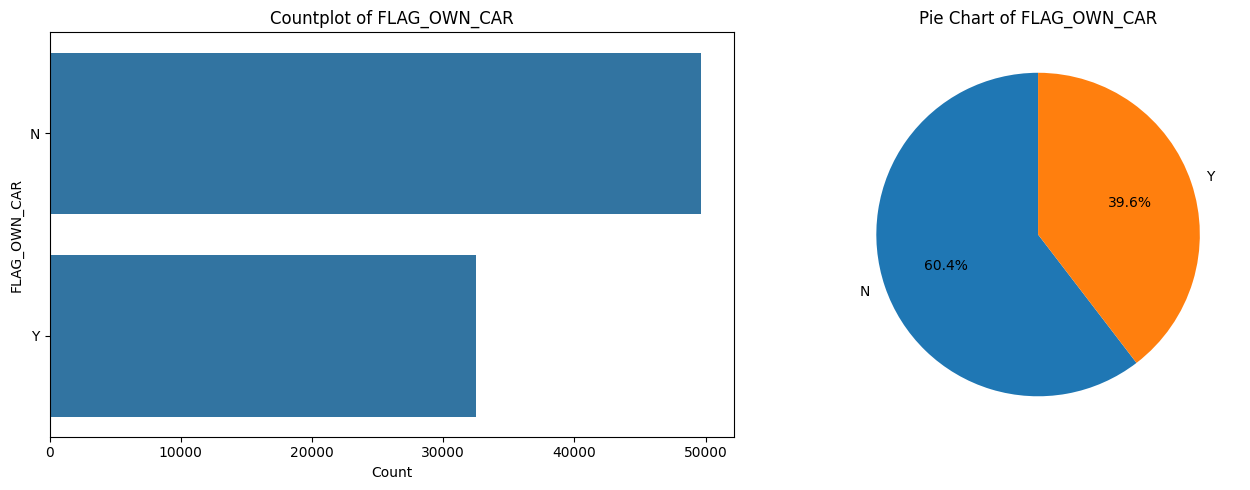

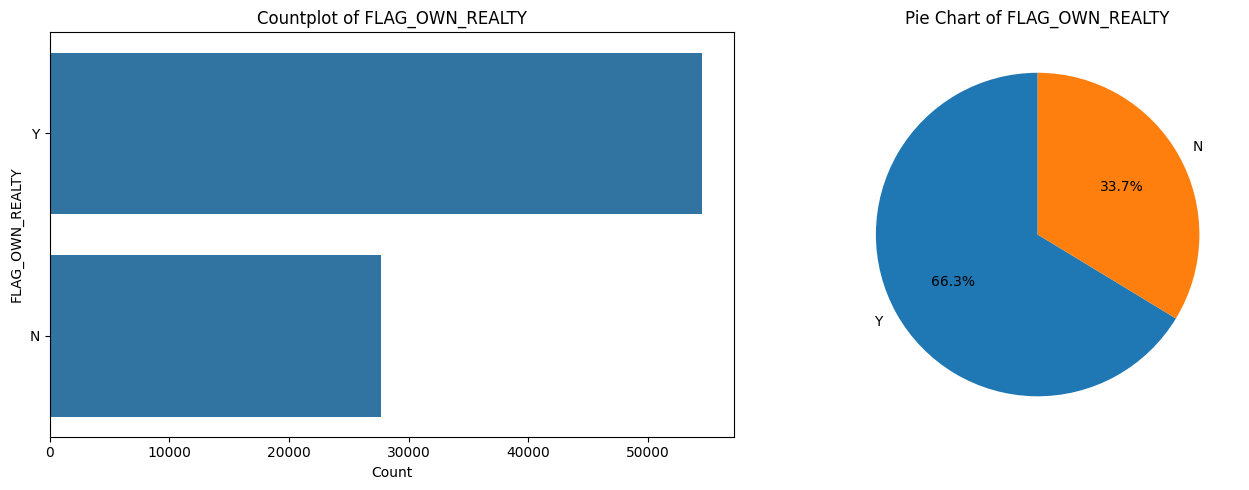

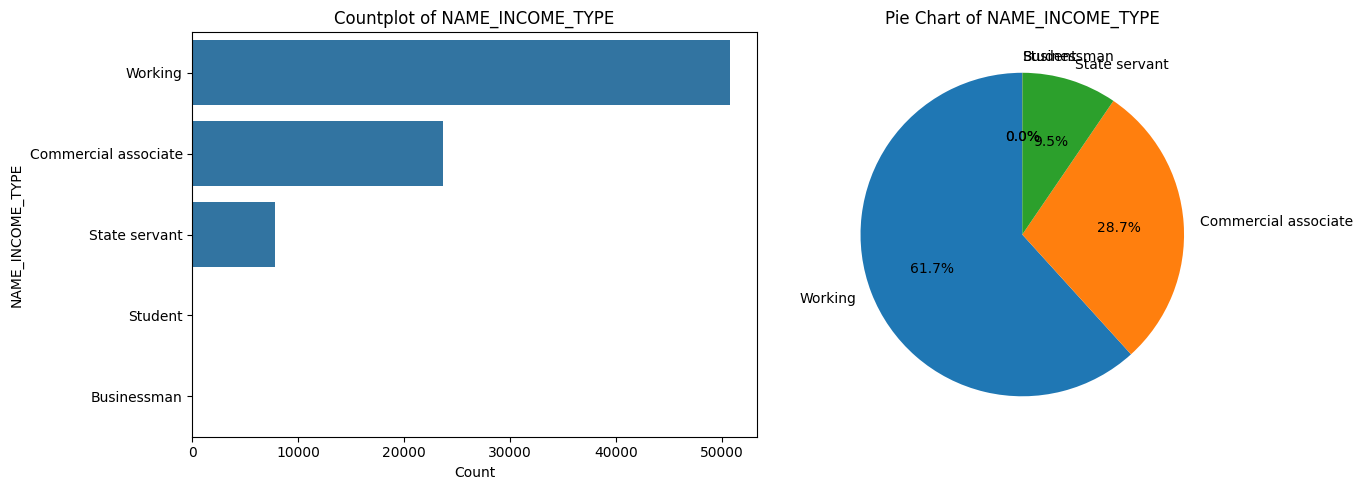

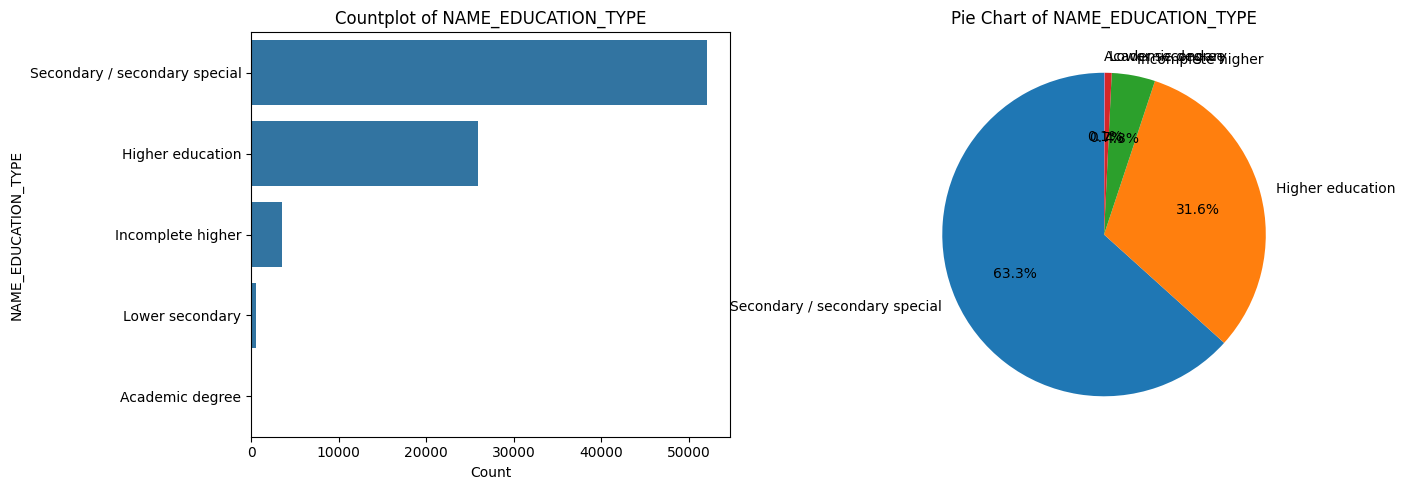

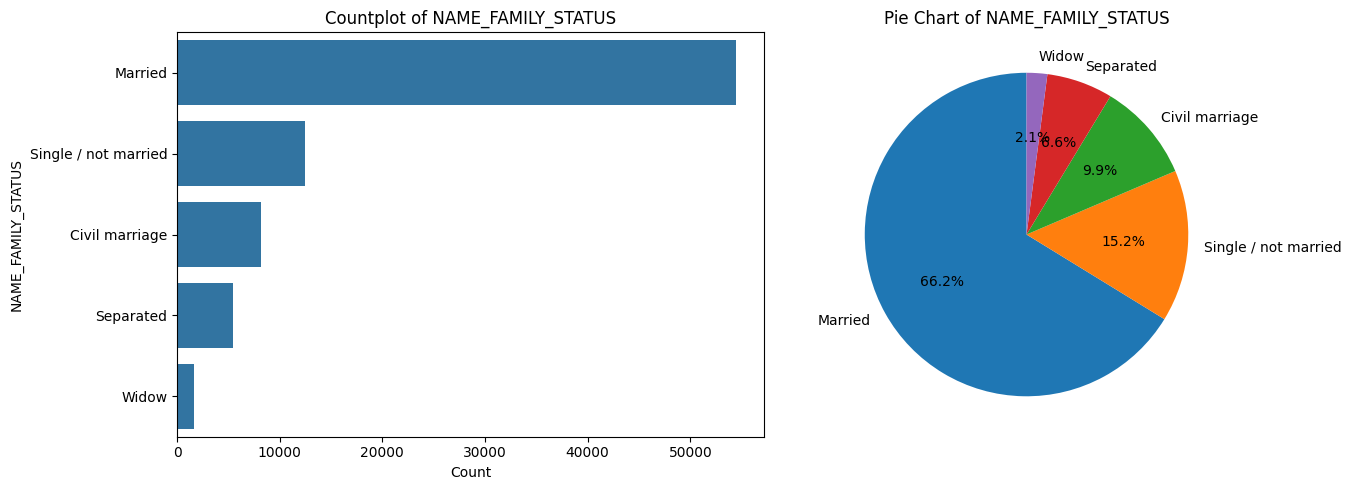

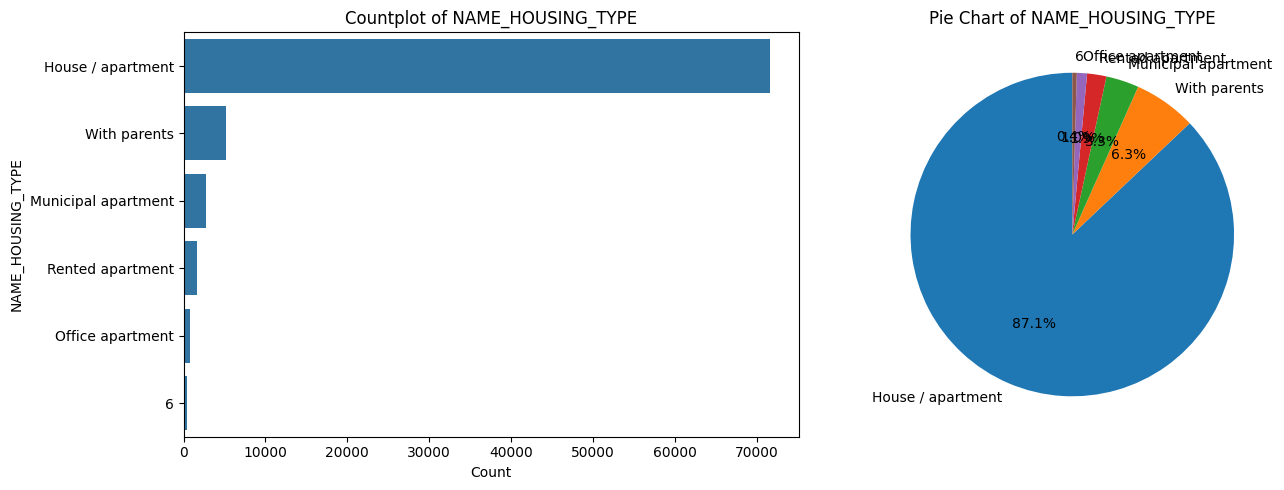

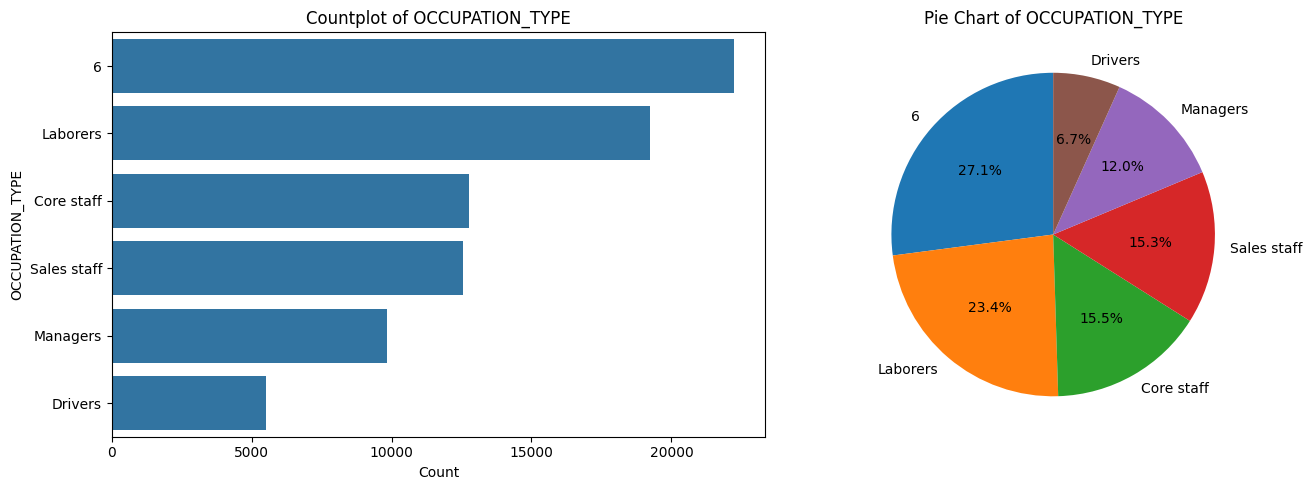

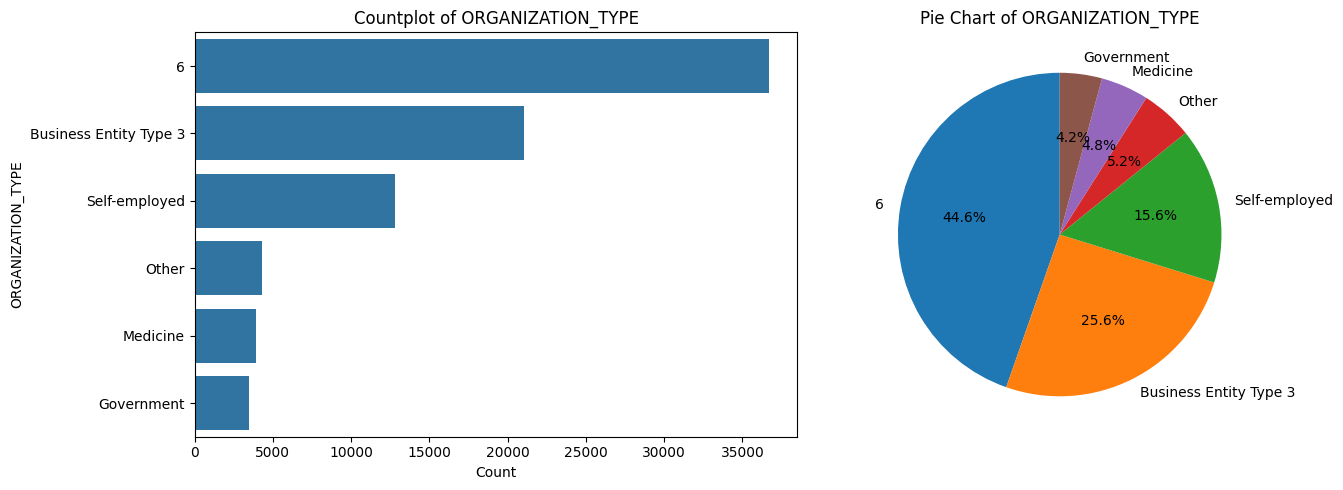

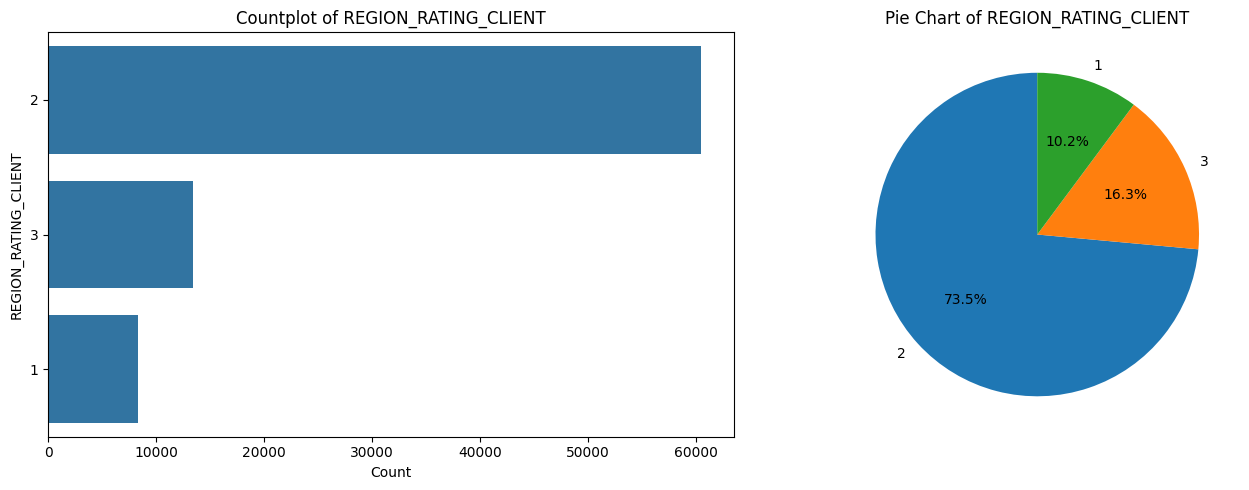

C:\Users\parvr\AppData\Local\Temp\ipykernel_20728\1870627589.py:20: FutureWarning: The behavior of obj[i:j] with a float-dtype index is deprecated. In a future version, this will be treated as positional instead of label-based. For label-based slicing, use obj.loc[i:j] instead
  pie_data = value_counts[:top_n]


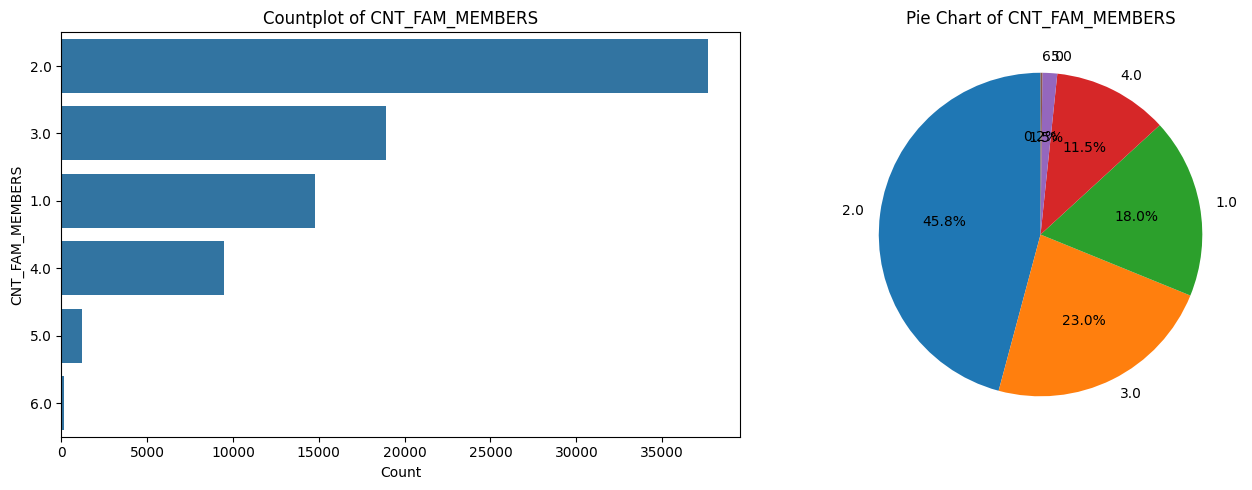

C:\Users\parvr\AppData\Local\Temp\ipykernel_20728\1870627589.py:20: FutureWarning: The behavior of obj[i:j] with a float-dtype index is deprecated. In a future version, this will be treated as positional instead of label-based. For label-based slicing, use obj.loc[i:j] instead
  pie_data = value_counts[:top_n]


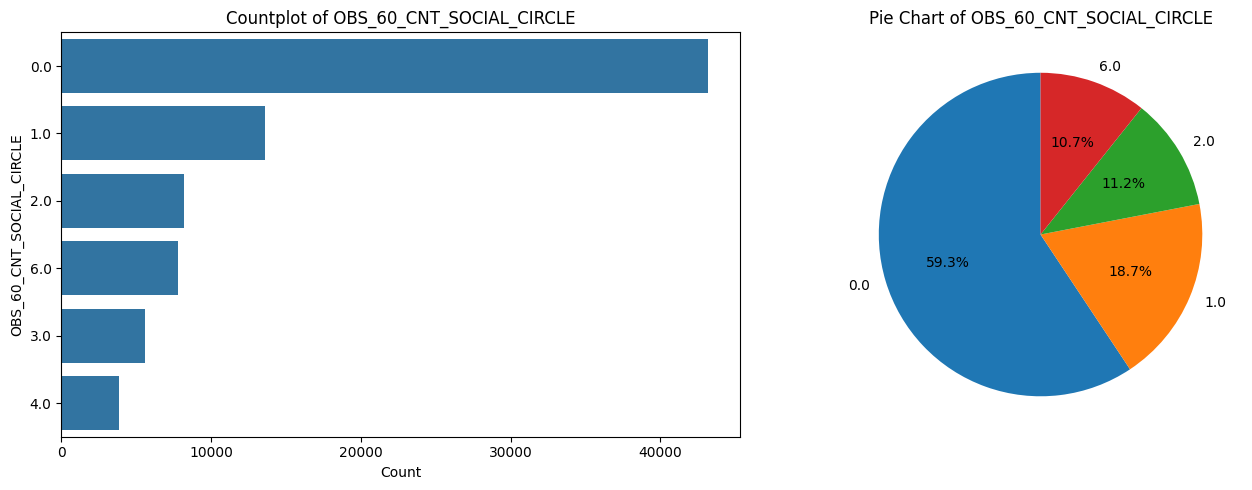

C:\Users\parvr\AppData\Local\Temp\ipykernel_20728\1870627589.py:20: FutureWarning: The behavior of obj[i:j] with a float-dtype index is deprecated. In a future version, this will be treated as positional instead of label-based. For label-based slicing, use obj.loc[i:j] instead
  pie_data = value_counts[:top_n]


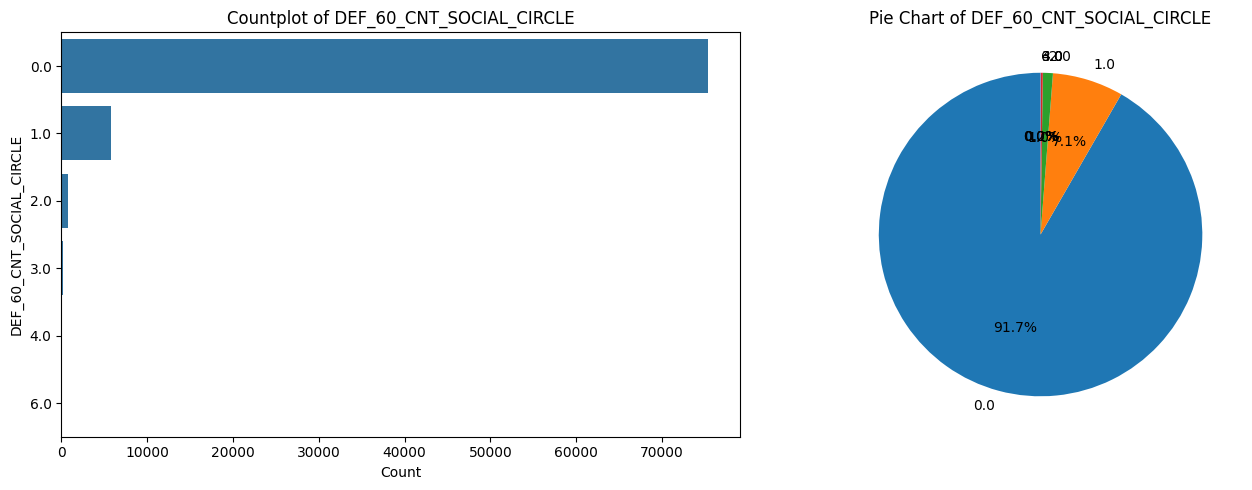

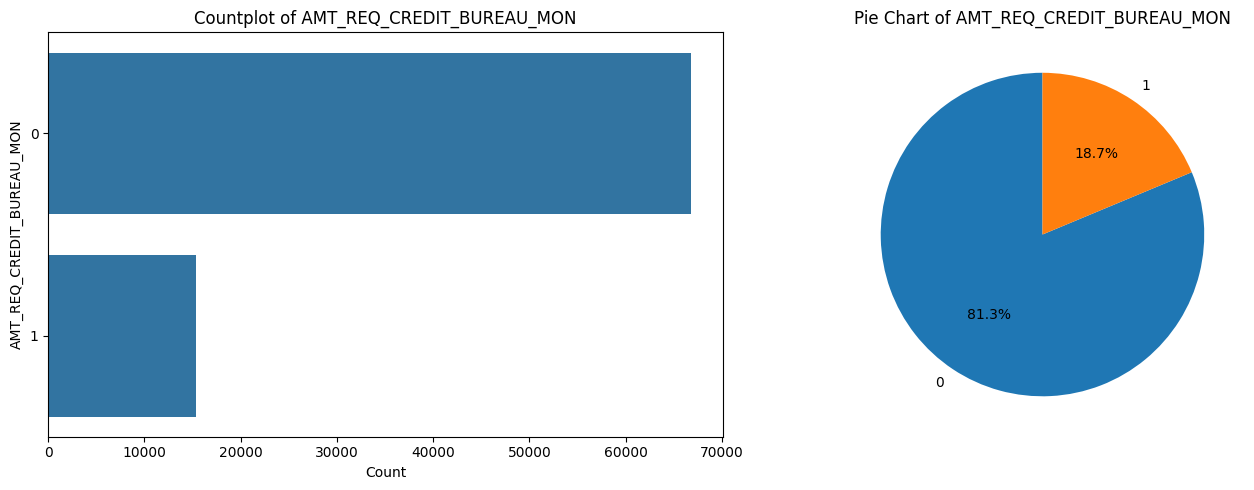

C:\Users\parvr\AppData\Local\Temp\ipykernel_20728\1870627589.py:20: FutureWarning: The behavior of obj[i:j] with a float-dtype index is deprecated. In a future version, this will be treated as positional instead of label-based. For label-based slicing, use obj.loc[i:j] instead
  pie_data = value_counts[:top_n]


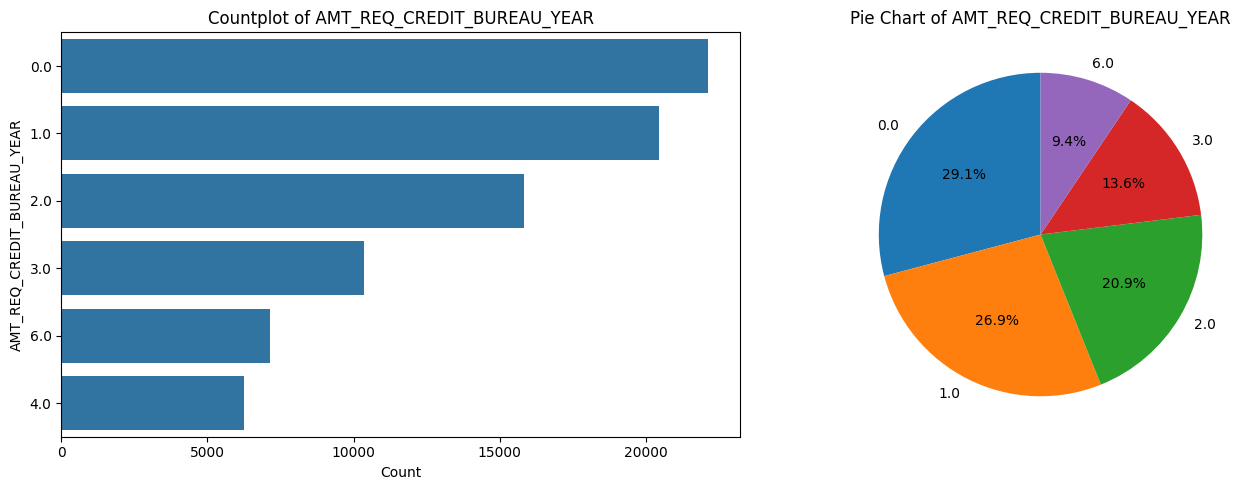

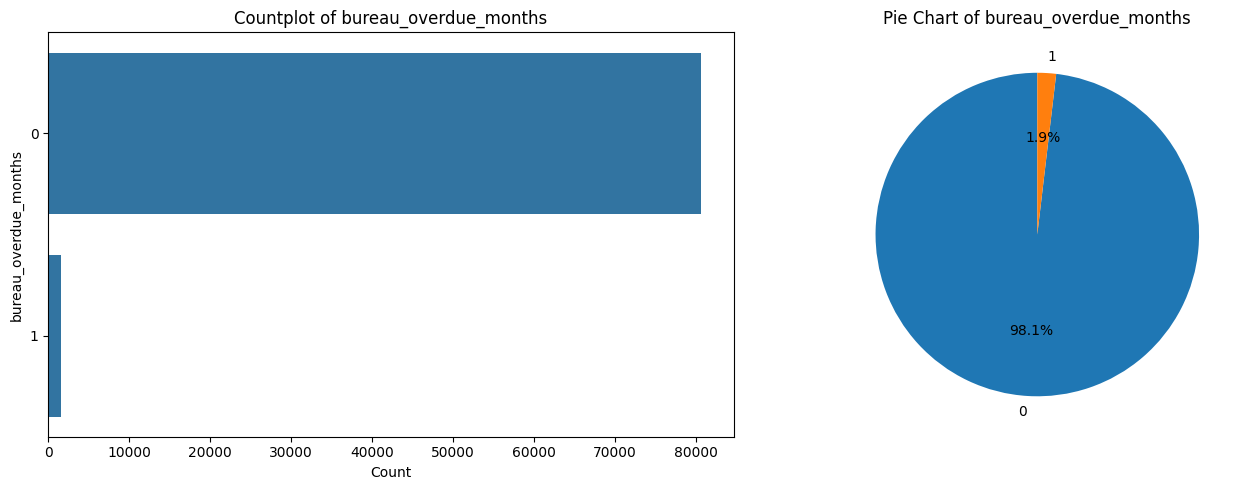

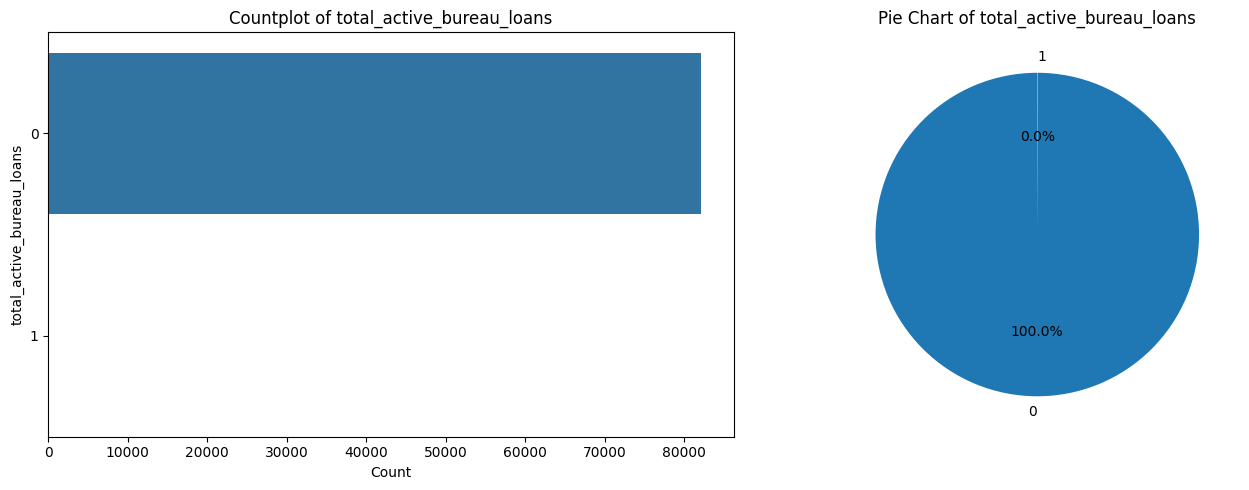

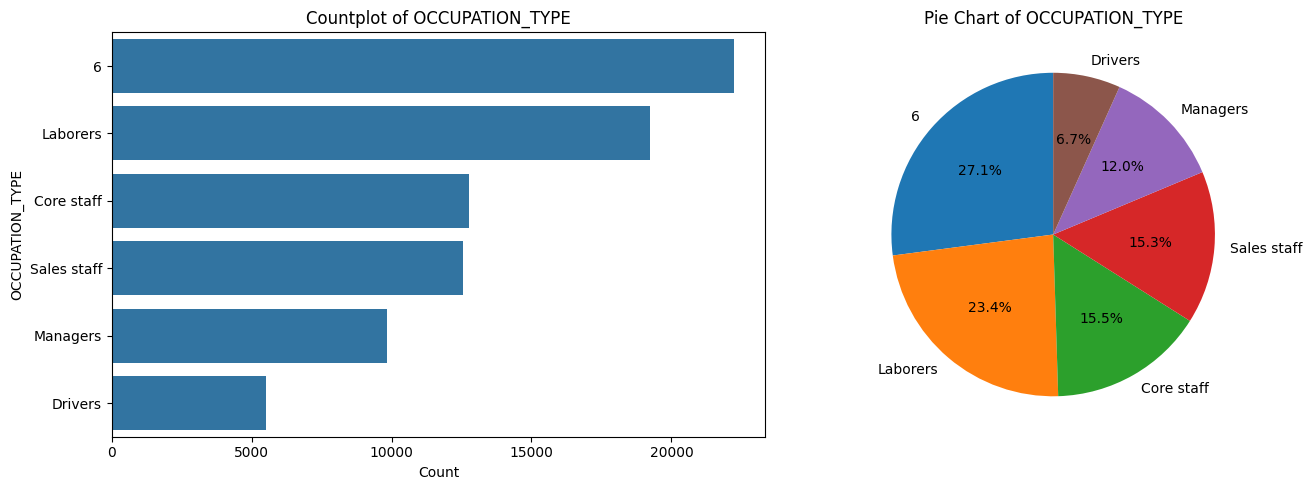

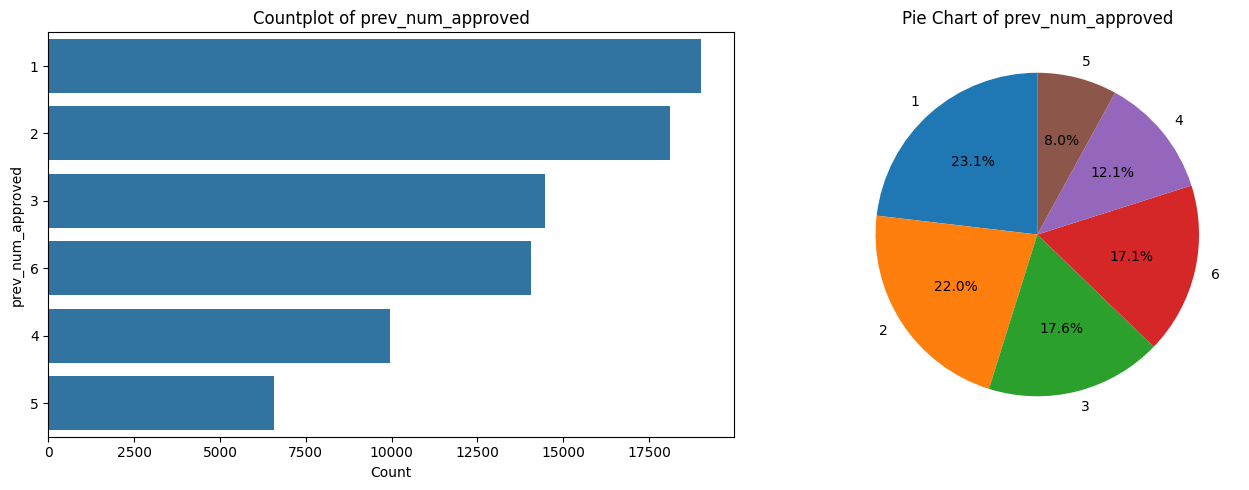

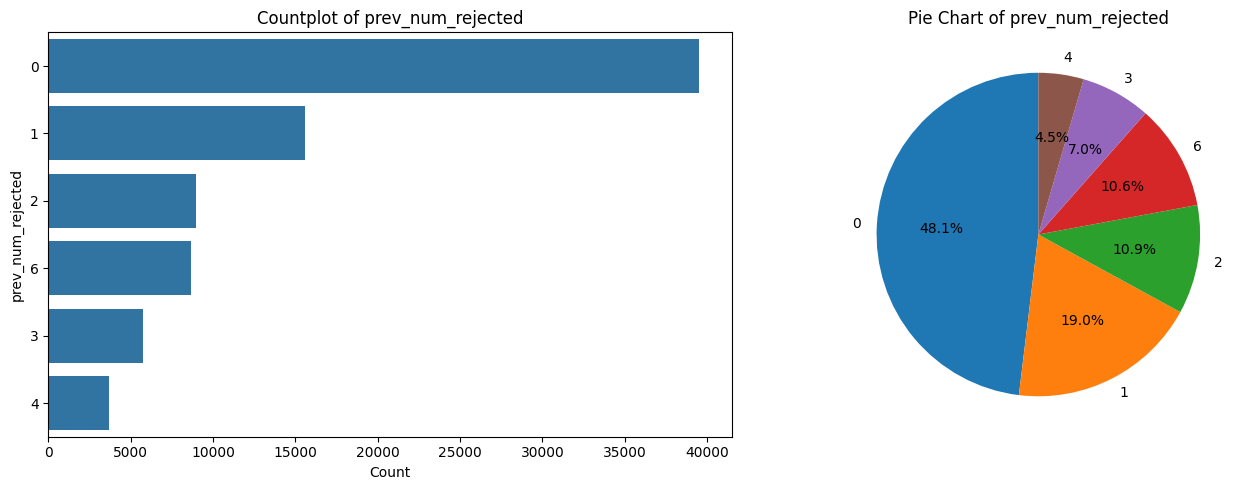

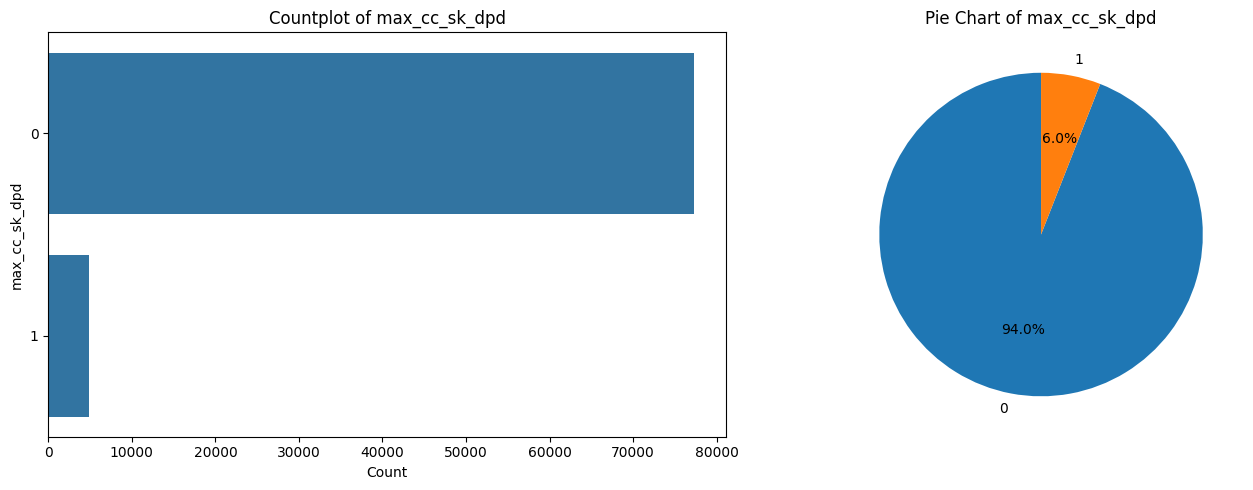

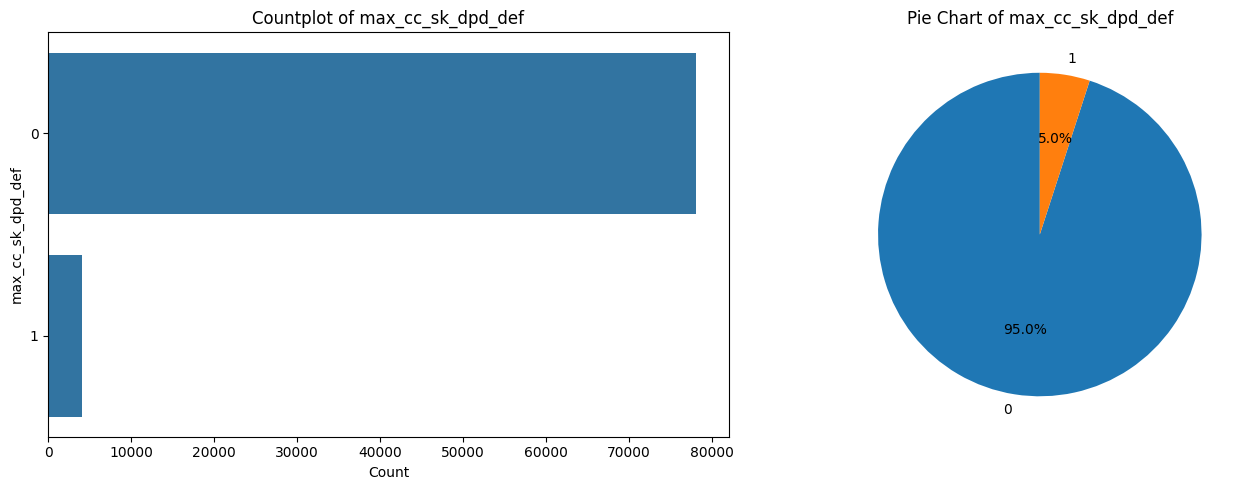

In [75]:
for col in list(cat_cols) + ['REGION_RATING_CLIENT','CNT_FAM_MEMBERS','OBS_60_CNT_SOCIAL_CIRCLE', 
                             'DEF_60_CNT_SOCIAL_CIRCLE','AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_YEAR','bureau_overdue_months',
                             'total_active_bureau_loans','OCCUPATION_TYPE','prev_num_approved', 'prev_num_rejected','max_cc_sk_dpd', 'max_cc_sk_dpd_def']:
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))

    # Countplot
    sns.countplot(
        y=col,
        data=df,
        order=df[col].value_counts().index,
        ax=axes[0]
    )
    axes[0].set_title(f'Countplot of {col}')
    axes[0].set_xlabel('Count')
    axes[0].set_ylabel(col)

    #  Pie chart (top 8 categories only) 
    value_counts = df[col].value_counts()
    top_n = 6
    pie_data = value_counts[:top_n]
    if len(value_counts) > top_n:
        pie_data['Other'] = value_counts[top_n:].sum()

    axes[1].pie(
        pie_data,
        labels=pie_data.index,
        autopct='%1.1f%%',
        startangle=90
    )
    axes[1].set_title(f'Pie Chart of {col}')

    plt.tight_layout()
    plt.show()

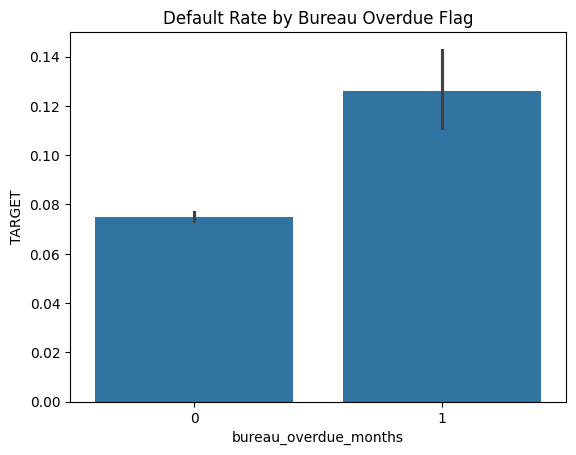

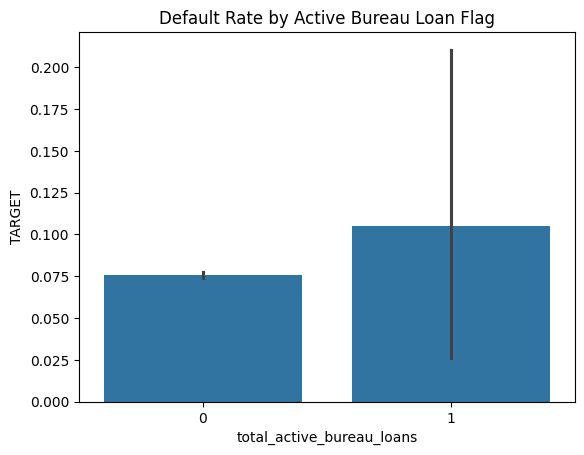

In [76]:

sns.barplot(x='bureau_overdue_months', y='TARGET', data=df)
plt.title('Default Rate by Bureau Overdue Flag')
plt.show()

sns.barplot(x='total_active_bureau_loans', y='TARGET', data=df)
plt.title('Default Rate by Active Bureau Loan Flag')
plt.show()


Multivariate Analysis

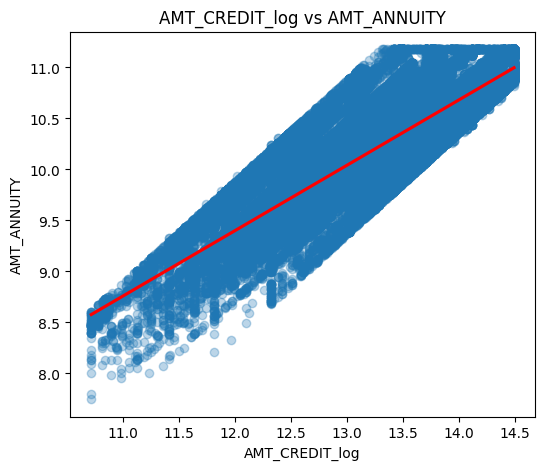

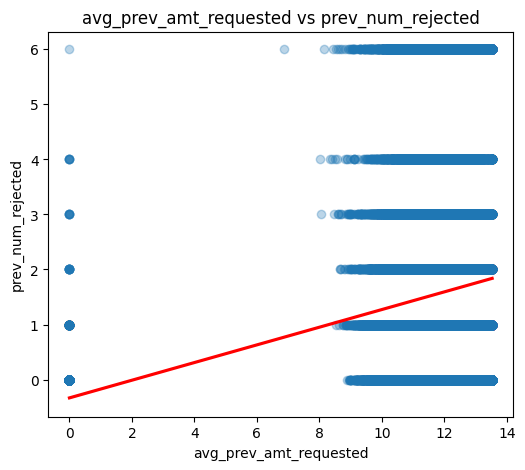

c:\Users\parvr\anaconda3\envs\fintech\lib\site-packages\numpy\lib\_nanfunctions_impl.py:1620: RuntimeWarning: All-NaN slice encountered
  return fnb._ureduce(a,


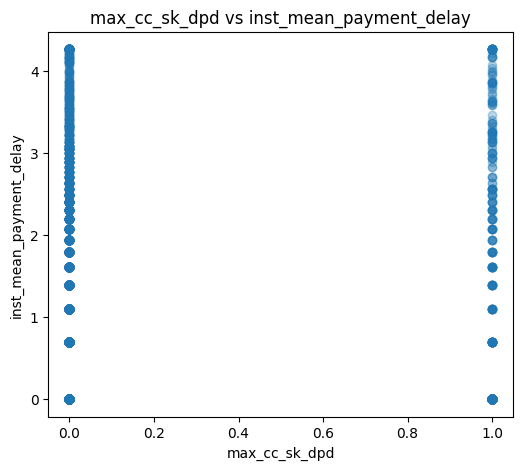

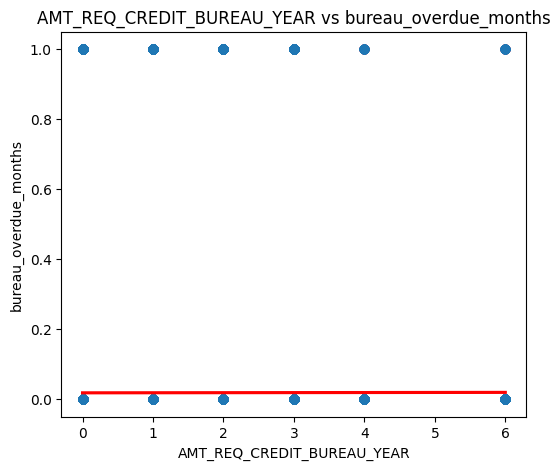

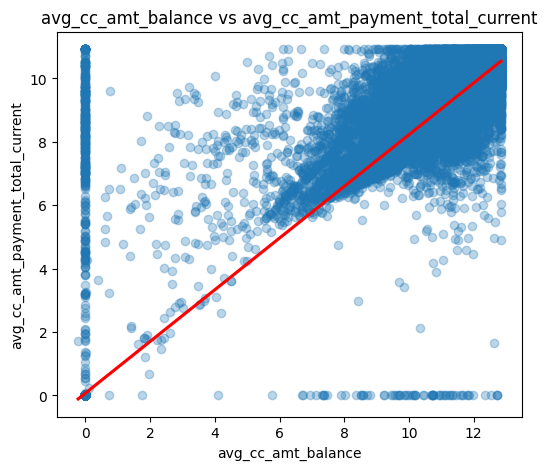

In [77]:
num_num_pairs = [
    ('AMT_CREDIT_log', 'AMT_ANNUITY'),
    ('avg_prev_amt_requested', 'prev_num_rejected'),
    ('max_cc_sk_dpd', 'inst_mean_payment_delay'),
    ('AMT_REQ_CREDIT_BUREAU_YEAR', 'bureau_overdue_months'),
    ('avg_cc_amt_balance', 'avg_cc_amt_payment_total_current')
]

for x, y in num_num_pairs:
    plt.figure(figsize=(6, 5))
    sns.regplot(
        x=df[x],
        y=df[y],
        scatter_kws={'alpha': 0.3},
        line_kws={'color': 'red'}
    )
    plt.title(f'{x} vs {y}')
    plt.show()

In [78]:
df['HAS_CC_DELINQUENCY'] = (df['max_cc_sk_dpd'] > 0).astype(int)
df['DELINQUENCY_SEVERITY'] = df['HAS_CC_DELINQUENCY'] * df['inst_mean_payment_delay']
df.drop(columns=['max_cc_sk_dpd'], inplace=True, errors='ignore')

In [79]:
df['CC_PAYMENT_RATIO'] = (
    df['avg_cc_amt_payment_total_current'] /
    (df['avg_cc_amt_balance'] + 1)
)

df['NO_CC_PAYMENT_FLAG'] = (df['avg_cc_amt_payment_total_current'] == 0).astype(int)
df.drop(columns=['avg_cc_amt_payment_total_current', 'avg_cc_amt_balance'], inplace=True, errors='ignore')

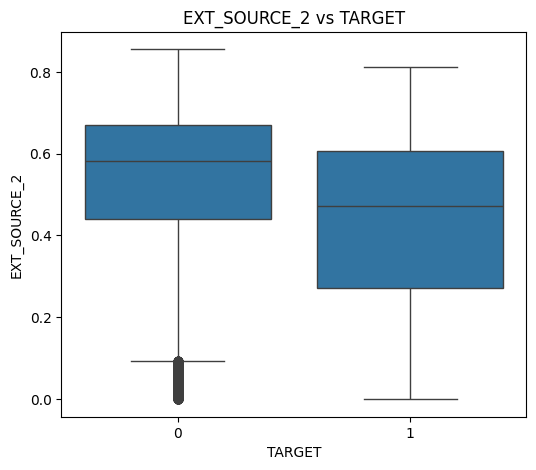

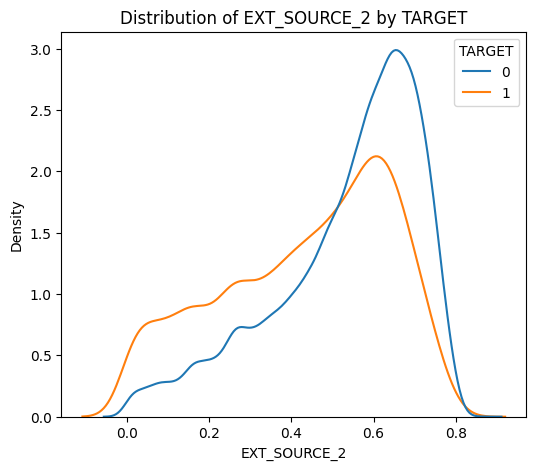

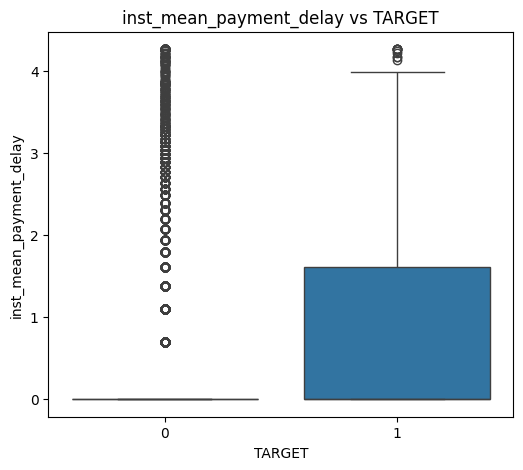

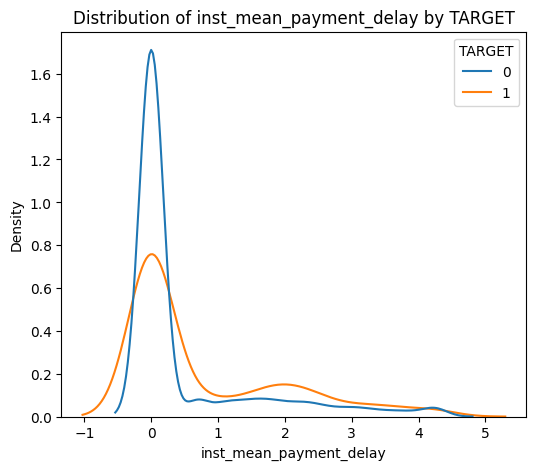

In [80]:
num_target_pairs = [
    'EXT_SOURCE_2',
    'inst_mean_payment_delay'
]

for col in num_target_pairs:
    plt.figure(figsize=(6, 5))
    sns.boxplot(x='TARGET', y=col, data=df)
    plt.title(f'{col} vs TARGET')
    plt.show()

    plt.figure(figsize=(6, 5))
    sns.kdeplot(data=df, x=col, hue='TARGET', common_norm=False)
    plt.title(f'Distribution of {col} by TARGET')
    plt.show()

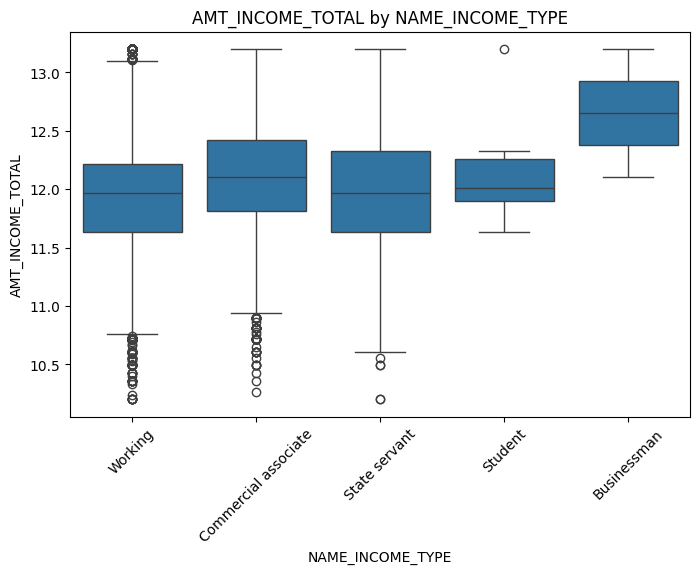

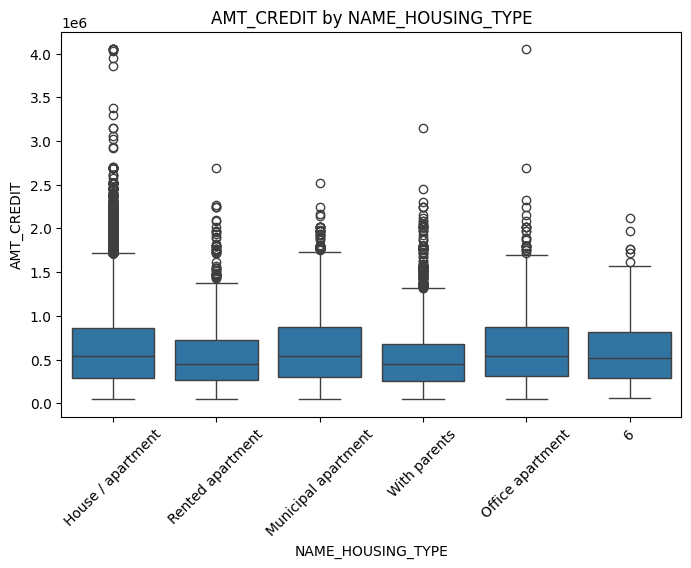

In [81]:
cat_num_pairs = [
    ('NAME_INCOME_TYPE', 'AMT_INCOME_TOTAL'),
    ('NAME_HOUSING_TYPE', 'AMT_CREDIT')
]

for cat, num in cat_num_pairs:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=cat, y=num, data=df)
    plt.xticks(rotation=45)
    plt.title(f'{num} by {cat}')
    plt.show()


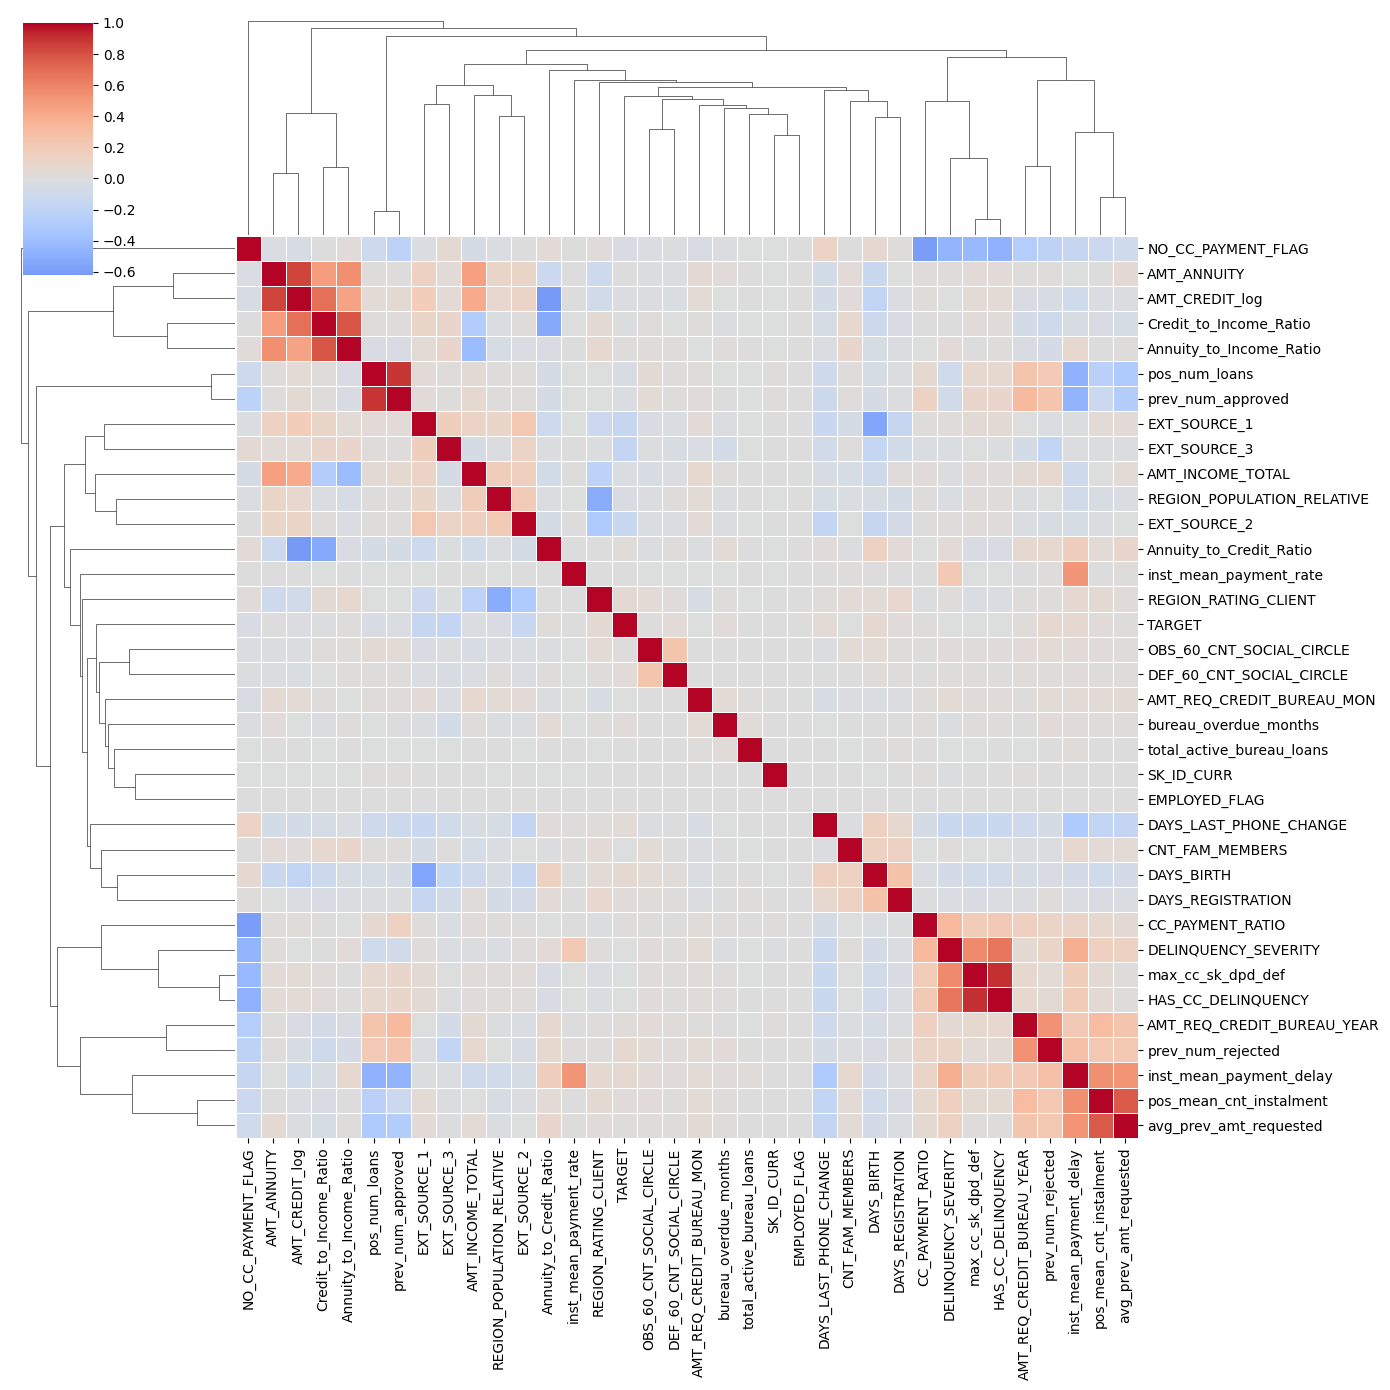

In [82]:
num_df = df.select_dtypes(include=['int64', 'float64'])
num_df = num_df.drop(columns=['AMT_CREDIT'])

# Calculate correlation with pairwise deletion
corr = num_df.corr(method='pearson', min_periods=10)  
corr = corr.fillna(0)

sns.clustermap(
    corr,
    cmap='coolwarm',
    center=0,
    figsize=(14, 14),
    linewidths=0.5
)

plt.show()

In [83]:
X = num_df.drop(columns=['SK_ID_CURR', 'TARGET'], errors='ignore')
X = X.replace([np.inf, -np.inf], np.nan)
X = X.fillna(X.mean())

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [84]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

print("Explained variance ratio:", pca.explained_variance_ratio_)
print("Total variance explained:", pca.explained_variance_ratio_.sum())


Explained variance ratio: [0.10208893 0.09078634]
Total variance explained: 0.19287527144658156


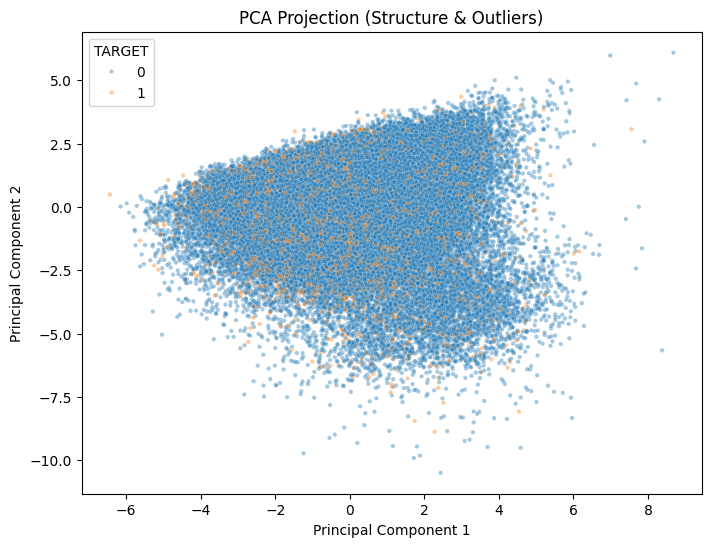

In [85]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=X_pca[:, 0],
    y=X_pca[:, 1],
    hue=df['TARGET'],
    alpha=0.4,
    s=10
)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Projection (Structure & Outliers)')
plt.show()


In [86]:
df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_ANNUITY', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE',
       'DAYS_BIRTH', 'DAYS_REGISTRATION', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'ORGANIZATION_TYPE', 'EXT_SOURCE_1',
       'EXT_SOURCE_2', 'EXT_SOURCE_3', 'OBS_60_CNT_SOCIAL_CIRCLE',
       'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_YEAR',
       'bureau_overdue_months', 'total_active_bureau_loans', 'pos_num_loans',
       'pos_mean_cnt_instalment', 'inst_mean_payment_delay',
       'inst_mean_payment_rate', 'avg_prev_amt_requested', 'prev_num_approved',
       'prev_num_rejected', 'max_cc_sk_dpd_def', 'Credit_to_Income_Ratio',
       'Annuity_to_Income_Ratio', 'Annuity_to_Credit_Ratio', 'AMT_CREDIT_lo

In [87]:
df.shape

(82180, 47)

In [88]:
final_features_classification = [

    # numeric (raw / ratios)
    'AMT_INCOME_TOTAL',
    'AMT_CREDIT',
    'AMT_ANNUITY',

    'Credit_to_Income_Ratio',
    'Annuity_to_Income_Ratio',
    'Annuity_to_Credit_Ratio',

    'EXT_SOURCE_1',
    'EXT_SOURCE_2',
    'EXT_SOURCE_3',

    'REGION_POPULATION_RELATIVE',
    'DAYS_BIRTH',
    'DAYS_REGISTRATION',
    'DAYS_LAST_PHONE_CHANGE',
    'CNT_FAM_MEMBERS',
    'REGION_RATING_CLIENT',

    'OBS_60_CNT_SOCIAL_CIRCLE',
    'DEF_60_CNT_SOCIAL_CIRCLE',

    'AMT_REQ_CREDIT_BUREAU_MON',
    'AMT_REQ_CREDIT_BUREAU_YEAR',

    'bureau_overdue_months',
    'total_active_bureau_loans',

    'pos_num_loans',
    'pos_mean_cnt_instalment',

    'inst_mean_payment_delay',
    'inst_mean_payment_rate',

    'avg_prev_amt_requested',
    'prev_num_approved',
    'prev_num_rejected',

    'max_cc_sk_dpd_def',
    'CC_PAYMENT_RATIO',
    'DELINQUENCY_SEVERITY',

    # binary flags
    'HAS_CC_DELINQUENCY',
    'NO_CC_PAYMENT_FLAG',

    # categorical (encode later)
    'NAME_CONTRACT_TYPE',
    'CODE_GENDER',
    'FLAG_OWN_CAR',
    'FLAG_OWN_REALTY',
    'NAME_INCOME_TYPE',
    'NAME_EDUCATION_TYPE',
    'NAME_FAMILY_STATUS',
    'NAME_HOUSING_TYPE',
    'OCCUPATION_TYPE',
    'ORGANIZATION_TYPE',

    # target
    'TARGET'
]


In [89]:
final_features_regression = [

    # numeric 
    'AMT_INCOME_TOTAL',
    'DAYS_BIRTH',
    'DAYS_REGISTRATION',
    'CNT_FAM_MEMBERS',
    'REGION_RATING_CLIENT',
    'REGION_POPULATION_RELATIVE',

    'EXT_SOURCE_1',
    'EXT_SOURCE_2',
    'EXT_SOURCE_3',

    'Credit_to_Income_Ratio',
    'Annuity_to_Income_Ratio',

    'pos_num_loans',
    'pos_mean_cnt_instalment',

    'avg_prev_amt_requested',
    'prev_num_approved',

    # categorical
    'NAME_CONTRACT_TYPE',
    'NAME_INCOME_TYPE',
    'NAME_EDUCATION_TYPE',
    'NAME_FAMILY_STATUS',
    'NAME_HOUSING_TYPE',
    'OCCUPATION_TYPE',
    'ORGANIZATION_TYPE',

    # target
    'AMT_CREDIT'
]


In [90]:
df[final_features_regression].to_csv("../data/final/Regression_table2.csv", index=False)
df[final_features_classification].to_csv("../data/final/Classification_table.csv", index=False)